 #  Regression Analysis Project
####  New York City Taxi Trip Duration


<br /><br /><br /><br />



                                   5조 오지조 - 이흥배, 안전수, 전유진, 오승현

---------------------

---------------------

# Contents

### Ⅰ. Introduction




### II. Load Dataset

   
   
   
### Ⅲ. Exploratory Data Analysis

   
   
   
### IV. Regression Analysis



### V. Conclusion

---------------------

---------------------

# Ⅰ. Introduction

### New York City Taxi Trip Duration

https://www.kaggle.com/c/nyc-taxi-trip-duration

#### - 뉴욕 시에서 택시 운행의 도착 시간을 예측하는 모델 구축

- 기본 데이터셋은 NYC 택시 및 리무진 위원회가 출시한 데이터로서, 픽업 시간, 지오 좌표, 승객 수 및 기타 여러 변수가 포함되어 있음

#### 파일 설명
- train.csv - the training set (1,458,644개의 이동기록을 포함)
- test.csv - the testing set (625,134개의 이동기록을 포함)
- sample_submission.csv - 제출용 csv파일

#### 데이터 필드

- id : a unique identifier for each trip
- vendor_id : a code indicating the provider associated with the trip record (범주형)
- pickup_datetime : date and time when the meter was engaged
- dropoff_datetime : date and time when the meter was disengaged
- passenger_count : the number of passengers in the vehicle (driver entered value)
- pickup_longitude : the longitude where the meter was engaged
- pickup_latitude : the latitude where the meter was engaged
- dropoff_longitude : the longitude where the meter was disengaged
- dropoff_latitude : the latitude where the meter was disengaged
- store_and_fwd_flag : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip(범주형)


- trip_duration: duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.



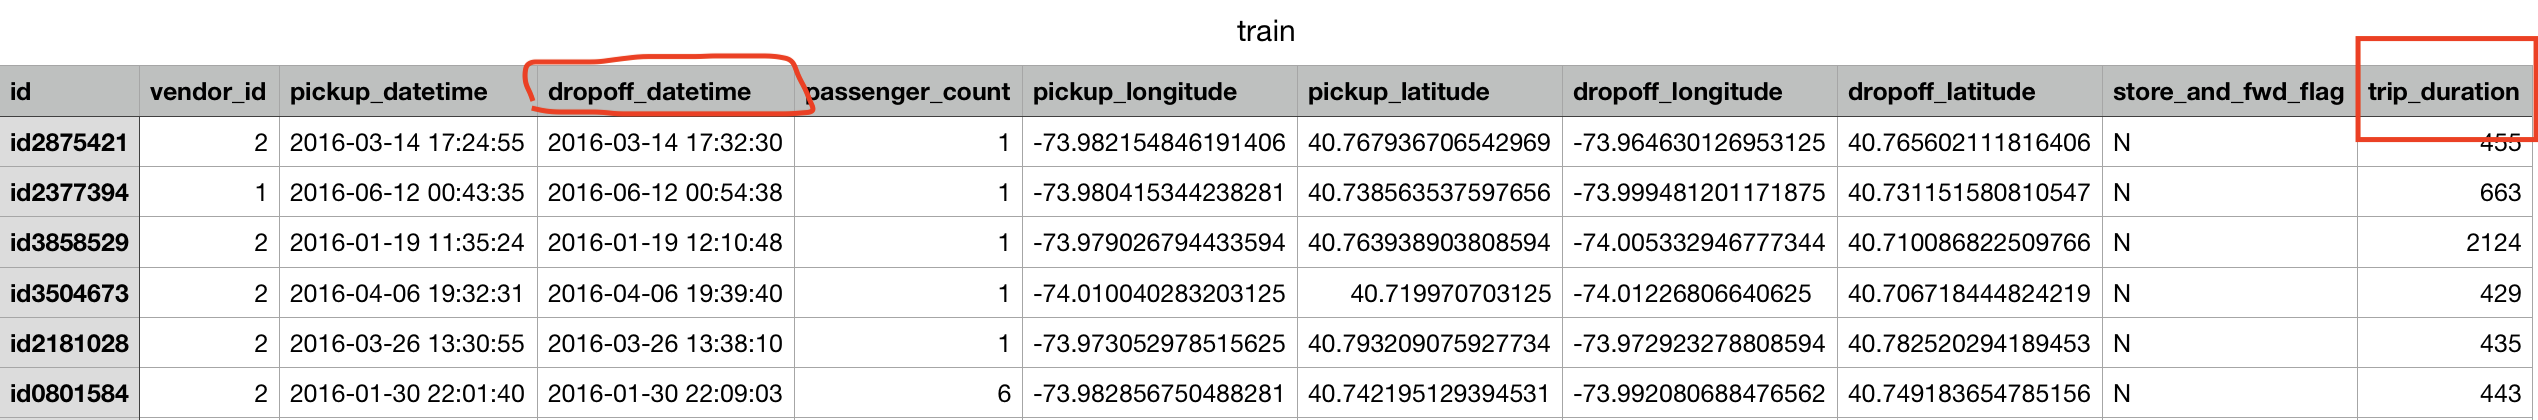

In [2]:
from IPython.display import Image
Image("train.png")

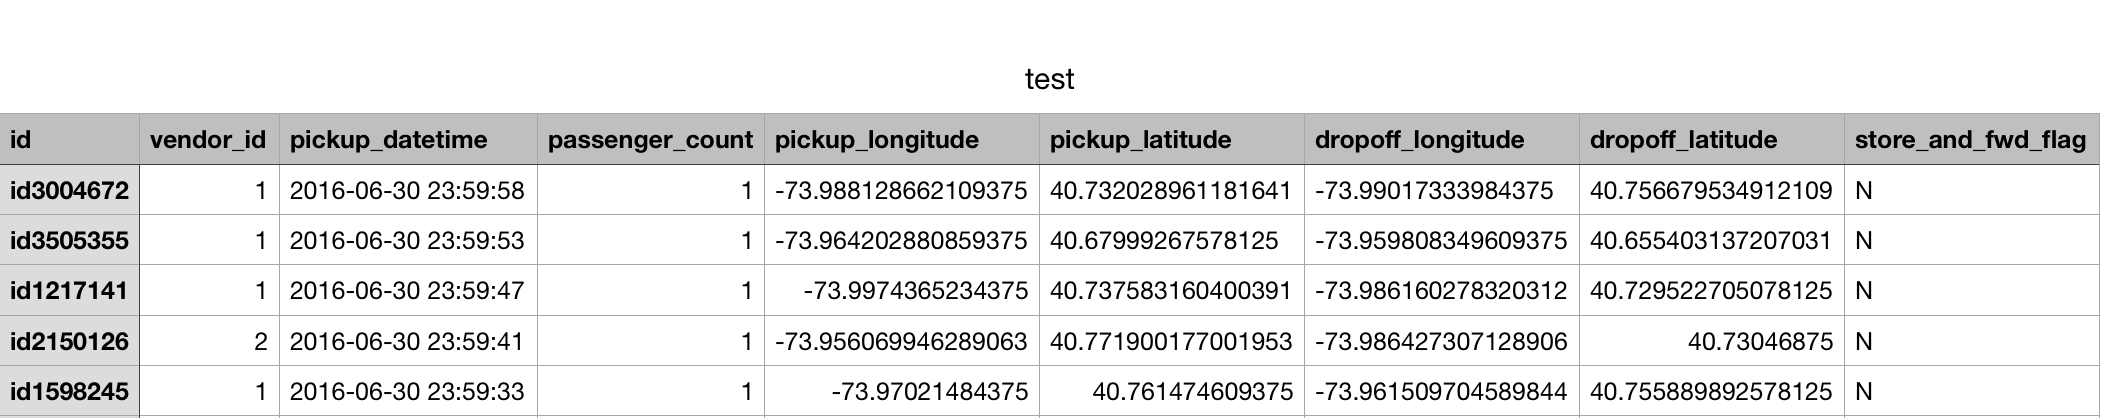

In [4]:
from IPython.display import Image
Image("test.png")

## 최종 모델: 정규화 선형회귀

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0001


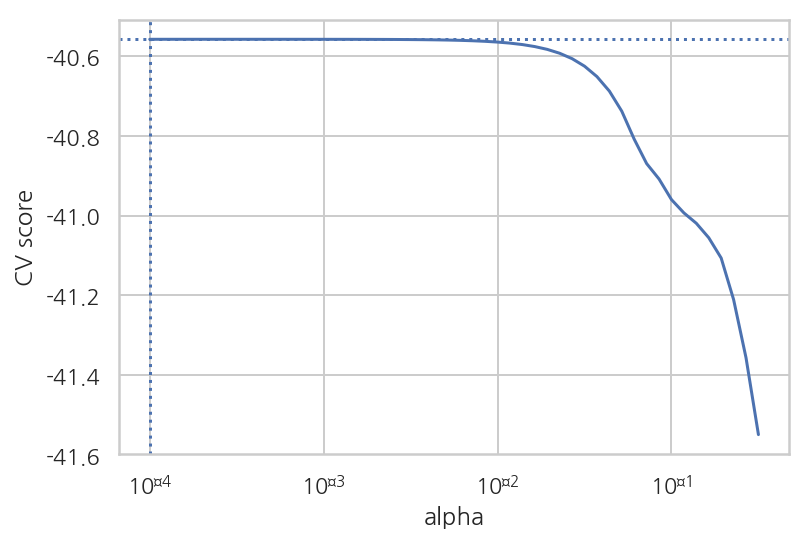

In [220]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -.5, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(dfX, dfy)

print(lasso_cv.alpha_)

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.semilogx(lasso_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')
plt.axvline(lasso_cv.alpha_, linestyle=':')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

In [241]:
result_regularized = model8.fit_regularized(alpha=0.001, L1_wt=0.5)
print(result_regularized.params)

C(vendor_id)[0]                                      6.146483
C(vendor_id)[1]                                      6.155969
C(pickup_level)[T.1]                                 0.371871
C(pickup_level)[T.2]                                 0.342417
C(holiday)[T.1]                                     -0.029601
scale(I(np.sin(I(2 * np.pi * dayofweek / 7))))       0.028230
scale(I(np.cos(I(2 * np.pi * dayofweek / 7))))      -0.038481
scale(pickup_HMS)                                    0.000000
scale(I(np.sqrt(haversine)))                         0.542007
scale(I(np.sin(I(2 * np.pi * pickup_Ymd / 365))))   -0.026434
scale(I(np.cos(I(2 * np.pi * pickup_Ymd / 365))))    0.000000
dtype: float64


평가는 RMSLE(Root Mean Squared Logarithmic Error)로 다음과 같이 계산된다.


$$\epsilon = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$$

- $\epsilon$ is the RMSLE value (score)
- $n$ is the total number of observations in the (public/private) data set,
- $p_{i}$ is your prediction of trip duration, and
- $a_{i}$ is the actual trip duration for i. 
- $\log(x)$ is the natural logarithm of x


#### 뉴욕의 교통

- 뉴욕은 맨해튼, 브루클린, 퀸스, 브롱크스, 스태튼아일랜드와 같은 다섯 개의 자치구(borough)로 이뤄져 있으며, 그중 맨해튼이 인구 밀도가 가장 높음
- 미국의 모든 대중교통 이용자의 약 3분의 1, 철도 사용자의 약 3분의 2가 뉴욕과 그 근교에 살고 있음
- 뉴욕은 인구 밀도는 높지만 자동차 이용률이 낮고 대중 교통 이용률이 높음
- 뉴욕은 시민의 54.6%가 대중 교통을 이용해 통근, 통학함
- 미국 인구조사국에 따르면, 뉴욕 시민이 출퇴근에 걸쳐있는 시간은 하루 평균 34.6분
- 맨해튼 방향으로 가는 택시를 yellow cabs, 그 외의 나머지 4개의 자치구로 향하는 택시를 green taxi라고 함

---------------------

---------------------

# II. Load Dataset

## 1. import module

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.spatial import distance
import statsmodels.api as sm
from math import cos, sin, radians, sqrt
import calendar
from datetime import datetime, timedelta
import datetime
import time
import requests
from lxml import html
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
import platform
from IPython.display import display

try:
    if platform.system() == "Darwin": # Mac
        font_location = "/Library/Fonts/AppleGothic.ttf" # 애플고딕
    elif platform.system() == "Windows": # Windows
        font_location = "C:\Windows\Fonts\malgunbd.ttf" # 맑은고딕
    elif platform.system() == "Linux": # Ubuntu
        font_location = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf" # 나눔고딕
except:
    print("Warnings: 한글폰트 경로를 확인해주세요")



try:
    import folium
except:
    print("Warnings: folium module을 설치해주세요")
    
try:
    from haversine import haversine
except:
    print("Warnings: haversine module을 설치해주세요")


    
plt.rcParams['axes.unicode_minus'] = False
pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline

---------------------

## 2. Load Dataset

### 1) Load Train Dataset

In [2]:
train_set = pd.read_csv("train.csv")

- 총 데이터의 row는 1458644개, feature는 11개
- 11개 각각의 feature의 이름과 자료형
- 전체 데이터에서 결측값이 존재하지 않음

In [31]:
display(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


None

In [60]:
display(train_set.tail())

id          vendor_id pickup_datetime      dropoff_datetime      \
1458639  id2376096  2          2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543  1          2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944  2          2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485  1          2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952  1          2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639  4               -73.982           40.746             
1458640  1               -74.001           40.747             
1458641  1               -73.959           40.769             
1458642  1               -73.982           40.749             
1458643  1               -73.980           40.782             

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458639 -73.995            40.740             N                  778            
1458640 -73.970            40.797             N                  655            
1458641 -74.004            40.707             N                  764            
1458642 -73.975            40.757             N                  373            
1458643 -73.973            40.791             N                  198

- 각 feature별 기초 통계량 테이블의 "trip_duration" feature가 mean과 median의 차이가 큰 것으로 보아 이상값이 존재할 가능성이 높음

In [61]:
train_set_describe = train_set.describe()
train_set_describe.loc['mean - median'] = train_set_describe.loc["mean"]-train_set_describe.loc["50%"]
display(train_set_describe.T)

count       mean    std      min      25%     50%     \
vendor_id         1458644.000   1.535    0.499    1.000   1.000   2.000   
passenger_count   1458644.000   1.665    1.314    0.000   1.000   1.000   
pickup_longitude  1458644.000 -73.973    0.071 -121.933 -73.992 -73.982   
pickup_latitude   1458644.000  40.751    0.033   34.360  40.737  40.754   
dropoff_longitude 1458644.000 -73.973    0.071 -121.933 -73.991 -73.980   
dropoff_latitude  1458644.000  40.752    0.036   32.181  40.736  40.755   
trip_duration     1458644.000 959.492 5237.432    1.000 397.000 662.000   

                   75%      max         mean - median  
vendor_id            2.000       2.000  -0.465         
passenger_count      2.000       9.000   0.665         
pickup_longitude   -73.967     -61.336   0.008         
pickup_latitude     40.768      51.881  -0.003         
dropoff_longitude  -73.963     -61.336   0.006         
dropoff_latitude    40.770      43.921  -0.003         
trip_duration     1075.000 3526282.000 297.492

-------

### 2) Load Test Dataset

In [3]:
test_set = pd.read_csv("test.csv")

In [32]:
display(test_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


None

In [62]:
display(test_set.tail())

id          vendor_id pickup_datetime       passenger_count  \
625129  id3008929  1          2016-01-01 00:02:52  1                 
625130  id3700764  1          2016-01-01 00:01:52  1                 
625131  id2568735  1          2016-01-01 00:01:24  2                 
625132  id1384355  1          2016-01-01 00:00:28  1                 
625133  id0621643  2          2016-01-01 00:00:22  2                 

        pickup_longitude  pickup_latitude  dropoff_longitude  \
625129 -74.003           40.725           -74.001              
625130 -74.006           40.744           -73.953              
625131 -73.972           40.760           -73.877              
625132 -73.977           40.734           -73.854              
625133 -73.982           40.717           -73.969              

        dropoff_latitude store_and_fwd_flag  
625129 40.734             N                  
625130 40.782             N                  
625131 40.749             N                  
625132 40.892             N                  
625133 40.769             N

In [63]:
test_set_describe = test_set.describe()
test_set_describe.loc['mean - median'] = test_set_describe.loc["mean"]-test_set_describe.loc["50%"]
display(test_set_describe.T)

count      mean    std   min      25%     50%     75%     \
vendor_id         625134.000   1.535 0.499    1.000   1.000   2.000   2.000   
passenger_count   625134.000   1.662 1.311    0.000   1.000   1.000   2.000   
pickup_longitude  625134.000 -73.974 0.073 -121.933 -73.992 -73.982 -73.967   
pickup_latitude   625134.000  40.751 0.030   37.390  40.737  40.754  40.768   
dropoff_longitude 625134.000 -73.973 0.073 -121.933 -73.991 -73.980 -73.963   
dropoff_latitude  625134.000  40.752 0.036   36.601  40.736  40.755  40.770   

                   max     mean - median  
vendor_id           2.000 -0.465          
passenger_count     9.000  0.662          
pickup_longitude  -69.249  0.008          
pickup_latitude    42.815 -0.003          
dropoff_longitude -67.497  0.006          
dropoff_latitude   48.858 -0.003

---------------------

---------------------

# Ⅲ. Pre-Processing

## 1. dependent variable: trip_duration

- 성능평가기준: RMSLE(Root Mean Squared Logarithmic Error)
$$\epsilon = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$$

- $\epsilon$ is the RMSLE value (score)
- $n$ is the total number of observations in the (public/private) data set,
- $p_{i}$ is your prediction of trip duration, and
- $a_{i}$ is the actual trip duration for i. 
- $\log(x)$ is the natural logarithm of x

- 성능평가기준에 맞춰 종속변수 trip_duration 값을 수정
$$y* = \log(y + 1)$$

- y* = log_trip_duration
- y = trip_duration


In [89]:
# 초단위에서 분으로 바꿔줌.
train_set["trip_duration"] = train_set["trip_duration"]/60

In [90]:
display(pd.DataFrame(train_set.describe()["trip_duration"]).T)

count  mean   std   min   25%   50%   75%     max
trip_duration 1458644.000 0.267 1.455 0.000 0.110 0.184 0.299 979.523

In [91]:
trip_duration_min_upper_limit = np.percentile(train_set["trip_duration"], 99.8)
display(round(trip_duration_min_upper_limit, 2))

1.54

In [92]:
rm_outlier_train_set = train_set[train_set["trip_duration"] < trip_duration_min_upper_limit]

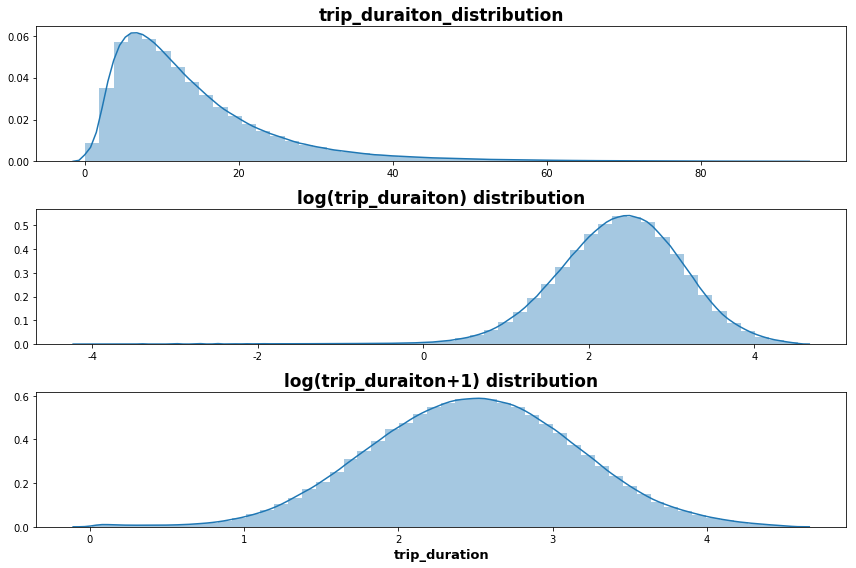

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
sns.distplot(rm_outlier_train_set.trip_duration.values, bins=50, kde=True, ax=ax1)
ax1.set_title("trip_duraiton_distribution", fontsize= 17, fontweight="bold")

# train_set['log_trip_duration'] = np.log(train_set['trip_duration'] + 1)
sns.distplot(np.log(rm_outlier_train_set.trip_duration.values), bins=50, kde=True, ax=ax2)
plt.xlabel('trip_duration', fontsize=13, fontweight="bold")
ax2.set_title("log(trip_duraiton) distribution", fontsize= 17, fontweight="bold")

sns.distplot(np.log1p(rm_outlier_train_set.trip_duration.values), bins=50, kde=True, ax=ax3)
plt.xlabel('trip_duration', fontsize=13, fontweight="bold")
ax3.set_title("log(trip_duraiton+1) distribution", fontsize= 17, fontweight="bold")

plt.tight_layout()
plt.show()

In [94]:
train_set["log_trip_duration"] = np.log1p(train_set.trip_duration)

---------

## 2. Basic features
    1) Basic feature : id
    2) Basic feature : vendor_id
    3) Basic feature : pickup_datetime, dropoff_datetime
    4) Basic feature : passenger_count
    5) Basic feature : pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
    6) Basic feature : store_and_fwd_flag

### 1) Basic feature : id
- id : 각각의 이동에 대한 유일한 식별자
- 위의 결과로 id는 동일한 것이 없으며, 필드의 정의와 같이 기록의 고유한 식별자인 것을 확인

In [20]:
display(pd.DataFrame([len(train_set["id"]), len(set(train_set["id"]))], columns=["id_value_count"], index=['total', "deduplication"]).T)

total  deduplication
id_value_count  1458644        1458644

### 2) Basic feature : vendor_id
- vendor_id : a code indicating the provider associated with the trip record (범주형)
- 택시 제공회사의 종류는 1,2만 존재
- 두 회사간의 비율 비교: chi-square 검정 사용하여 비율이 정말 다른지 살펴보면 유의확률 값이 0에 가까운 값으로 귀무가설 $H_{0}:\mu_{id=1}=\mu_{id=2}$를 기각할 수 있음
- 두 제공회사의 빈도는 차이가 있으며 통계적으로 유의미하다고 할 수 있음

In [166]:
display(train_set[["id","vendor_id"]].groupby(by="vendor_id").size().reset_index(name="value_count").set_index("vendor_id").T)
print("Chi-Test:", sp.stats.chisquare(train_set.groupby(by="vendor_id").size()))

vendor_id    1       2     
value_count  678342  780302

Chi-Test: Power_divergenceResult(statistic=7127.058829981819, pvalue=0.0)


### 3) Basic feature : pickup_datetime, dropoff_datetime

- pickup_datetime : date and time when the meter was engaged
- dropoff_datetime : date and time when the meter was disengaged
- "pickup_datetime"과 "dropoff_datetime" columns을 string dtype에서 datetime dtype으로 변환
- "pickup_datetime"을 연, 월, 일, 시간, 분, 시간+분+초 형태로 변환

In [95]:
train_set["pickup_datetime"] = pd.to_datetime(train_set["pickup_datetime"])
train_set["dropoff_datetime"] = pd.to_datetime(train_set["dropoff_datetime"])

In [96]:
test_set["pickup_datetime"] = pd.to_datetime(test_set["pickup_datetime"])

In [97]:
# pickup_datetime을 연, 월, 일, 시간, 분, 월+일+시간+분+초, 일+시간+분+초, 시간+분+초 형태로 변환
train_set["pickup_Y"] = train_set["pickup_datetime"].apply(lambda x: x.year)
train_set["pickup_m"] = train_set["pickup_datetime"].apply(lambda x: x.month)
train_set["pickup_d"] = train_set["pickup_datetime"].apply(lambda x: x.day)
train_set["pickup_H"] = train_set["pickup_datetime"].apply(lambda x: x.hour)
train_set["pickup_M"] = train_set["pickup_datetime"].apply(lambda x: x.minute)
train_set["pickup_mdHMS"] = train_set["pickup_datetime"].apply(lambda x: x.month + x.day/12 + x.hour/(24*12) + x.minute/(60*24*12) + x.second/(3600*24*12))
train_set["pickup_dHMS"] = train_set["pickup_datetime"].apply(lambda x: x.day + x.hour/24 + x.minute/(60*24) + x.second/(3600*24))
train_set["pickup_HMS"] = train_set["pickup_datetime"].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [98]:
# pickup_datetime을 연, 월, 일, 시간, 분, 월+일+시간+분+초, 일+시간+분+초, 시간+분+초 형태로 변환
test_set["pickup_Y"] = test_set["pickup_datetime"].apply(lambda x: x.year)
test_set["pickup_m"] = test_set["pickup_datetime"].apply(lambda x: x.month)
test_set["pickup_d"] = test_set["pickup_datetime"].apply(lambda x: x.day)
test_set["pickup_H"] = test_set["pickup_datetime"].apply(lambda x: x.hour)
test_set["pickup_M"] = test_set["pickup_datetime"].apply(lambda x: x.minute)
test_set["pickup_mdHMS"] = test_set["pickup_datetime"].apply(lambda x: x.month + x.day/12 + x.hour/(24*12) + x.minute/(60*24*12) + x.second/(3600*24*12))
test_set["pickup_dHMS"] = test_set["pickup_datetime"].apply(lambda x: x.day + x.hour/24 + x.minute/(60*24) + x.second/(3600*24))
test_set["pickup_HMS"] = test_set["pickup_datetime"].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [26]:
display(train_set[['pickup_datetime', 'pickup_Y','pickup_m', 'pickup_d', 'pickup_H', 'pickup_M', 'pickup_mdHMS', 'pickup_dHMS', 'pickup_HMS']].tail())

pickup_datetime  pickup_Y  pickup_m  pickup_d  pickup_H  pickup_M  \
1458639 2016-04-08 13:31:04      2016         4         8        13        31   
1458640 2016-01-10 07:35:15      2016         1        10         7        35   
1458641 2016-04-22 06:57:41      2016         4        22         6        57   
1458642 2016-01-05 15:56:26      2016         1         5        15        56   
1458643 2016-04-05 14:44:25      2016         4         5        14        44   

         pickup_mdHMS  pickup_dHMS  pickup_HMS  
1458639         4.714        8.563      13.518  
1458640         1.860       10.316       7.587  
1458641         5.858       22.290       6.961  
1458642         1.472        5.664      15.941  
1458643         4.468        5.614      14.740

#### ① 연도
- train_set과 test_set data는 동일하게 2016년도 1월부터 6월까지의 자료
- 연도는 2016년밖에 없기 때문에 분석에서 제외

In [99]:
ym = pd.DataFrame([[set(train_set.pickup_Y), set(train_set.pickup_m)], [set(test_set.pickup_Y), set(test_set.pickup_m)]]).T
ym.columns = ["train_set_deduplication", "test_set_deduplication"]; ym.index=["year", "month"]
display(ym)

train_set_deduplication test_set_deduplication
year                   {2016}                 {2016}
month      {1, 2, 3, 4, 5, 6}     {1, 2, 3, 4, 5, 6}

#### ② 월
- 월도 1~6월까지의 data만 존재하나, train_set과 test_set이 동일한 구간(1~6월)에 data가 존재함으로 분석에 고려
- 월별 운행기록의 횟수는 비슷하지만, 월별 이동거리에 대한 중앙값은 다르기 때문에 월별 변수는 trip_variable에 영향을 주는 범주형 변수

In [100]:
id_m = train_set.groupby(by=["pickup_m"])["id"].size().reset_index(drop=False)
id_m = id_m.set_index("pickup_m").T
id_m.index = ["id_value_count"]
display(id_m)

pickup_m             1       2       3       4       5       6
id_value_count  229707  238300  256189  251645  248487  234316

In [101]:
rm_outlier_train_set = train_set[train_set["trip_duration"] < trip_duration_min_upper_limit]

# outlier를 제외시키고 나머지 데이터들을 가지고 월평균 단위가 분인 trip_duration을 만들어서 비교해본다.
grouped_month_median = rm_outlier_train_set.groupby('pickup_m')['log_trip_duration'].aggregate(np.median).reset_index()
grouped_month_mean = rm_outlier_train_set.groupby('pickup_m')['log_trip_duration'].aggregate(np.mean).reset_index()

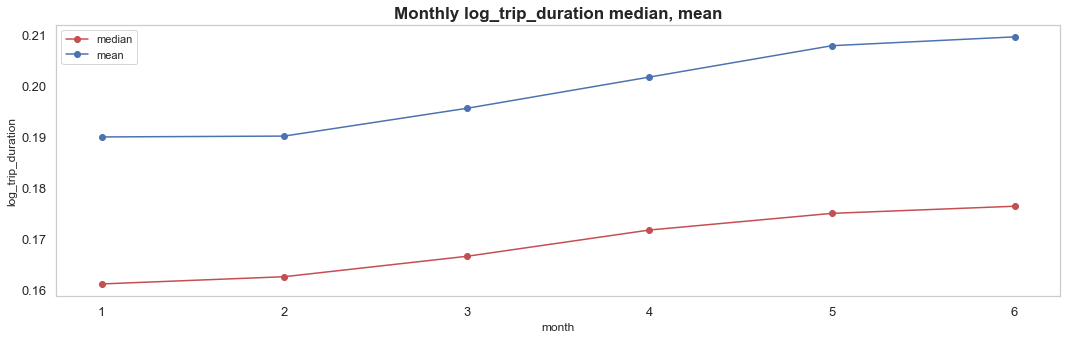

In [102]:
fig = plt.figure(figsize=(18,5))
plt.plot(grouped_month_median['pickup_m'],grouped_month_median['log_trip_duration'], '-ro', label='median')
plt.plot(grouped_month_mean['pickup_m'],grouped_month_mean['log_trip_duration'], '-bo', label='mean')
plt.title('Monthly log_trip_duration median, mean', fontsize= 17, fontweight="bold")
plt.legend()
plt.xlabel('month')
plt.ylabel('log_trip_duration')
plt.grid()
plt.show()

#### ② 일
- 일별 운행 횟수는 마지막 29일과 30일을 제외하고는 크게 차이가 없음

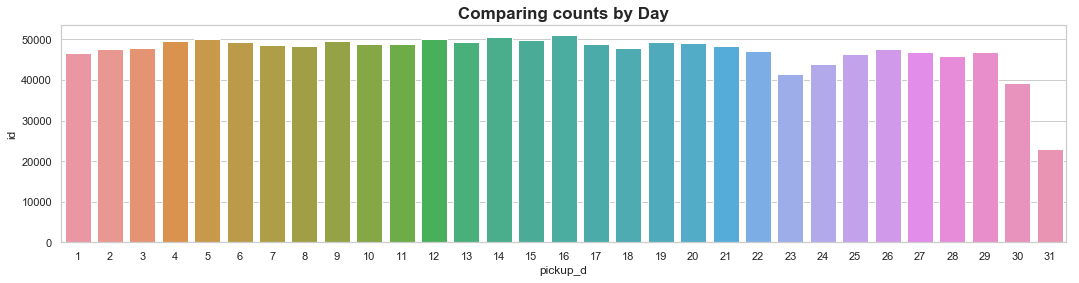

pickup_d     1      2      3      4      5      6      7      8      9   \
id        46612  47752  47945  49655  50176  49476  48671  48248  49634   

pickup_d     10  ...       22     23     24     25     26     27     28  \
id        48867  ...    47254  41450  43876  46450  47595  46957  45891   

pickup_d     29     30     31  
id        46807  39135  22988  

[1 rows x 31 columns]

Chi-Test: Power_divergenceResult(statistic=16817.94126736887, pvalue=0.0)


In [34]:
plt.figure(figsize=(18,4))
id_d = train_set.groupby(by=["pickup_d"])["id"].size().reset_index(drop=False)
id_d = id_d.set_index('pickup_d').T
sns.barplot(x=id_d.columns, y=id_d.loc['id'])
plt.title('Comparing counts by Day', fontsize= 17, fontweight="bold")
plt.show()
display(id_d)
print("Chi-Test:", sp.stats.chisquare(train_set.groupby(by=["pickup_d"])["id"].size()))

In [35]:
# outlier를 제외시키고 나머지 데이터들을 가지고 월평균 단위가 분인 trip_duration을 만들어서 비교해본다.
grouped_month_median = rm_outlier_train_set.groupby('pickup_d')['log_trip_duration'].aggregate(np.median).reset_index()
grouped_month_mean = rm_outlier_train_set.groupby('pickup_d')['log_trip_duration'].aggregate(np.mean).reset_index()

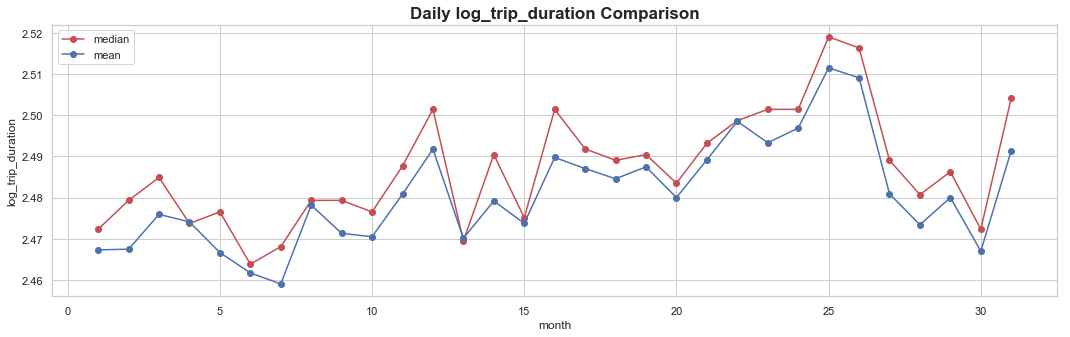

In [36]:
# 아래 그래프를 보고 일 데이터가 log_trip_duration에 영향을 준다는 사실을 알 수 있다.
plt.figure(figsize=(18,5))
plt.plot(grouped_month_median['pickup_d'],grouped_month_median['log_trip_duration'], '-ro', label='median')
plt.plot(grouped_month_mean['pickup_d'],grouped_month_mean['log_trip_duration'], '-bo', label='mean')
plt.legend(loc="upper left",)
plt.xlabel('month')
plt.ylabel('log_trip_duration')
plt.title('Daily log_trip_duration Comparison', fontsize= 17, fontweight="bold")
plt.show()

#### ③ 요일, 공휴일
- 운행한 요일을 계산하는 'dayofweek' column 추가
- "dayofweek" 데이터를 통해 휴일(주말과 공휴일)과 평일로 구분
- "dayofweek" feature와 공휴일 list를 비교하여 "dayofweek" 데이터 안에 공휴일이 포함되어 있는지 확인
<br /><br />
##### <뉴욕주 공휴일><br />
    - 1월 1일(신년), 1월 셋째 월요일(마틴 루터 킹 기념일), 2월 셋째 월요일(대통령의 날),
    - 5월 넷째 월요일(현충일), 7월 4일(독립기념일), 9월 첫째 월요일(노동절),
    - 10월 둘째 월요일(콜럼버스 기념일), 11월 11일(재향군인의 날), 11월 넷째 목요일(추수감사절), 
    - 12월 25일(크리스마스)

In [103]:
# 요일 'dayofweek' column 추가
train_set["dayofweek"]= train_set["pickup_datetime"].apply(lambda x : x.weekday())
test_set["dayofweek"]= test_set["pickup_datetime"].apply(lambda x : x.weekday())

In [104]:
def holiday_search(x): 
    holidays = ["2016-01-01", "2016-01-18", "2016-02-15", "2016-05-30", "2016-07-04",\
                "2016-09-05", "2016-10-10", "2016-11-11", "2016-11-24", "2016-12-25"]
    
    weekday = calendar.weekday(x.timetuple().tm_year, x.timetuple().tm_mon, x.timetuple().tm_mday)
    
    if x.date().strftime("%Y-%m-%d") in holidays :    
        return 1
    elif weekday == 5 or weekday == 6 :
        return 1
    else:
        return 0
    
# 휴일 'holiday' column 추가
train_set["holiday"] = train_set["pickup_datetime"].apply(lambda x : holiday_search(x))
test_set["holiday"] = test_set["pickup_datetime"].apply(lambda x : holiday_search(x))

- 전체 1,458,644건 중 공휴일은 27,251건
- 전체 1,458,644건 중 휴일은 443,485건

In [39]:
display(train_set[["pickup_datetime", "dayofweek", "holiday"]].tail())
print("train_set 휴일 건수:", sum(train_set["holiday"]))
print("test_set 휴일 건수:", sum(test_set["holiday"]))

pickup_datetime  dayofweek  holiday
1458639 2016-04-08 13:31:04          4        0
1458640 2016-01-10 07:35:15          6        1
1458641 2016-04-22 06:57:41          4        0
1458642 2016-01-05 15:56:26          1        0
1458643 2016-04-05 14:44:25          1        0

train_set 휴일 건수: 443485
test_set 휴일 건수: 189516


In [105]:
# outlier를 제외시키고 나머지 데이터들을 가지고 일평균 단위가 분인 trip_duration을 만들어서 비교해본다.
rm_outlier_train_set = train_set[train_set["trip_duration"] < trip_duration_min_upper_limit]
grouped_month_median = rm_outlier_train_set.groupby('dayofweek')['log_trip_duration'].aggregate(np.median).reset_index()
grouped_month_mean = rm_outlier_train_set.groupby('dayofweek')['log_trip_duration'].aggregate(np.mean).reset_index()

In [49]:
display(grouped_month_median)
display(grouped_month_mean)

dayofweek  log_trip_duration
0          0              2.441
1          1              2.510
2          2              2.530
3          3              2.549
4          4              2.518
5          5              2.450
6          6              2.399

dayofweek  log_trip_duration
0          0              2.446
1          1              2.503
2          2              2.523
3          3              2.538
4          4              2.509
5          5              2.435
6          6              2.400

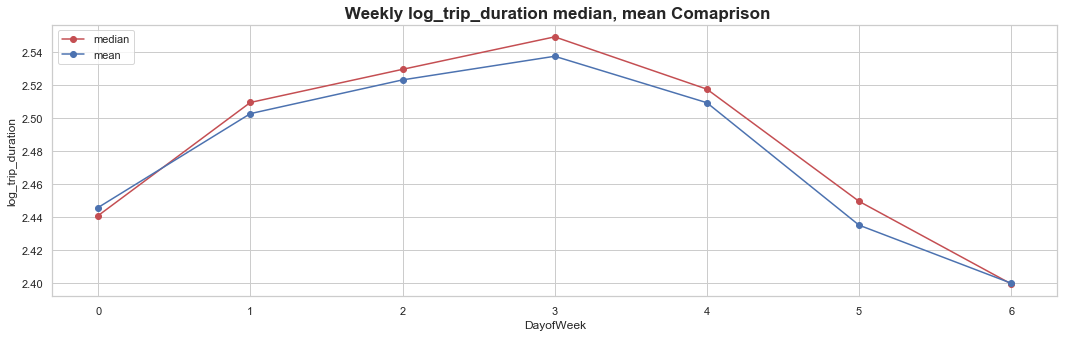

In [42]:
plt.figure(figsize=(18,5))
plt.plot(grouped_month_median['dayofweek'],grouped_month_median['log_trip_duration'], '-ro', label='median')
plt.plot(grouped_month_mean['dayofweek'],grouped_month_mean['log_trip_duration'], '-bo', label='mean')
plt.legend(loc="upper left",)
plt.xlabel('DayofWeek')
plt.ylabel('log_trip_duration')
plt.title(' Weekly log_trip_duration median, mean Comaprison', fontsize= 17, fontweight="bold")
plt.show()

④ 시간

In [106]:
# timelevel_by_30m 함수는 30분간격으로 하루는 나누어주는 함수
def timelevel_by_30m():
    ls=[]
    for i in np.arange(24):
        ls.append(datetime.time(i, 0))
        ls.append(datetime.time(i, 30))
    ls.append(datetime.time(23, 59, 59, 59))
    return ls

In [107]:
# count_by_time함수는 timelevel_by_30m함수에서의 출력값을 받아서,
# 시간범주를 train_set_time_pos 데이터 프레임에 "pickup_level"이란 column을 추가해 주기 위한 함수
def count_by_time(datas):
    level = timelevel_by_30m()
    for i in np.arange(48):
        if level[i] <= datas.time() < level[i+1]:
            return level[i].strftime('%H:%M:%S')+"~"+level[i+1].strftime('%H:%M:%S')
    return "non-exist"

In [108]:
train_set_time_pos=train_set[['log_trip_duration','pickup_Y', 'pickup_longitude', 'pickup_latitude']]
train_set_time_pos["pickup_level"] = train_set["pickup_datetime"].apply(lambda x : count_by_time(x))
test_set_time_pos=test_set[['pickup_Y', 'pickup_longitude', 'pickup_latitude']]
test_set_time_pos["pickup_level"] = test_set["pickup_datetime"].apply(lambda x : count_by_time(x))
display(train_set_time_pos["pickup_level"].tail())

1458639    13:30:00~14:00:00
1458640    07:30:00~08:00:00
1458641    06:30:00~07:00:00
1458642    15:30:00~16:00:00
1458643    14:30:00~15:00:00
Name: pickup_level, dtype: object

In [109]:
print("pickup_level:", sum(train_set_time_pos.groupby(by="pickup_level").size()),"회 계산")
print('평균값:', round(np.mean(train_set_time_pos.groupby(by="pickup_level").size()), 1))
print('중앙값:', round(np.median(train_set_time_pos.groupby(by="pickup_level").size()), 1))

pickup_level: 1458644 회 계산
평균값: 30388.4
중앙값: 33889.5


- 30분 별로 운행수의 평균, 중앙값을 제거한 데이터를 살펴보고 어떠 통계량을 기준으로 시간대를 나눌지 결정

In [110]:
# 평균 기준 편차
mean_pickupbytime = (train_set_time_pos.groupby(by="pickup_level").size()-\
 np.mean(train_set_time_pos.groupby(by="pickup_level").size())).reset_index(name="count")
# 중앙값 기준 편차
median_pickupbytime = (train_set_time_pos.groupby(by="pickup_level").size()\
-np.median(train_set_time_pos.groupby(by="pickup_level").size())).reset_index(name="count")

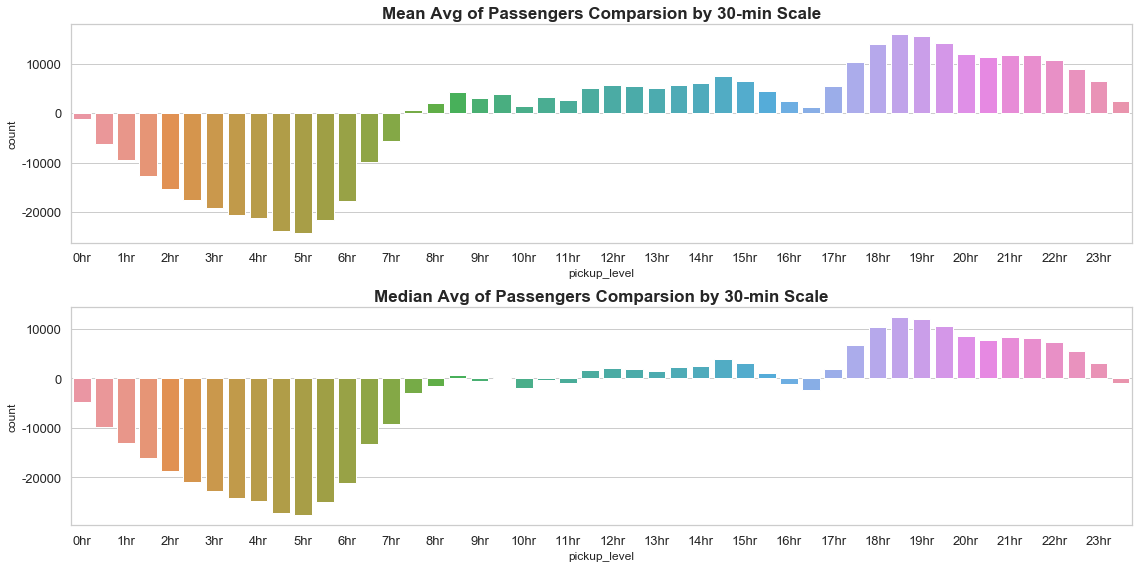

In [48]:
fig = plt.figure(figsize=(16, 8))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)

ax1 = fig.add_subplot(2, 1, 1)
sns.barplot(x=mean_pickupbytime["pickup_level"], y=mean_pickupbytime["count"], data=mean_pickupbytime, ax=ax1)
ax1.xaxis.set_major_formatter(plt.NullFormatter())
plt.title("Mean Avg of Passengers Comparsion by 30-min Scale", fontsize= 17, fontweight="bold")
plt.xticks(np.arange(48), ('0hr', "", '1hr',"", '2hr', "",'3hr',"", '4hr',"",
              '5hr',"", '6hr',"", '7hr',"",'8hr',"", '9hr',"",'10hr',"",'11hr',"", '12hr',"", '13hr',"",'14hr',"",'15hr',"", '16hr',
                           "",'17hr',"",'18hr',"", '19hr',"", '20hr',"", '21hr',"", '22hr',"", '23hr'))

ax2 = fig.add_subplot(2, 1, 2)
sns.barplot(x=median_pickupbytime["pickup_level"], y=median_pickupbytime["count"], data=median_pickupbytime, ax=ax2)
ax2.xaxis.set_major_formatter(plt.NullFormatter())
plt.title("Median Avg of Passengers Comparsion by 30-min Scale", fontsize= 17, fontweight="bold")
plt.xticks(np.arange(48), ('0hr', "", '1hr',"", '2hr', "",'3hr',"", '4hr',"",
              '5hr',"", '6hr',"", '7hr',"",'8hr',"", '9hr',"",'10hr',"",'11hr',"", '12hr',"", '13hr',"",'14hr',"",'15hr',"", '16hr',
                           "",'17hr',"",'18hr',"", '19hr',"", '20hr',"", '21hr',"", '22hr',"", '23hr'))

plt.tight_layout()
plt.show()

- 30분단위로 택시 운행수의 평균을 구해 $1\pm\sigma$를 운행이 활발하지 않은 상태, 평균적인 상태, 평균보다 많은 상태의 총 3가지 범주로 구분

In [111]:
mean_pickupbytime_plus_1std = np.mean(train_set_time_pos.groupby(by="pickup_level").size())+\
np.std(train_set_time_pos.groupby(by="pickup_level").size())
mean_pickupbytime_plus_1std = int(mean_pickupbytime_plus_1std)
mean_pickupbytime_plus_1std

41862

In [112]:
mean_pickupbytime_minus_1std = np.mean(train_set_time_pos.groupby(by="pickup_level").size())-\
np.std(train_set_time_pos.groupby(by="pickup_level").size())
mean_pickupbytime_minus_1std = int(mean_pickupbytime_minus_1std)
mean_pickupbytime_minus_1std

18914

In [113]:
time_level_table = train_set_time_pos.groupby(by="pickup_level").size().reset_index(name="count")
time_level_table.tail()

pickup_level  count
43  21:30:00~22:00:00  42056
44  22:00:00~22:30:00  41155
45  22:30:00~23:00:00  39337
46  23:00:00~23:30:00  36883
47  23:30:00~23:59:59  32902

In [114]:
mean_1sigma_under = list(time_level_table[time_level_table["count"]<mean_pickupbytime_minus_1std]["pickup_level"])
mean_1sigma_under[:5]

['01:30:00~02:00:00',
 '02:00:00~02:30:00',
 '02:30:00~03:00:00',
 '03:00:00~03:30:00',
 '03:30:00~04:00:00']

In [115]:
mean_1sigma_over = list(time_level_table[time_level_table["count"]>mean_pickupbytime_plus_1std]["pickup_level"])
mean_1sigma_over[:5]

['18:00:00~18:30:00',
 '18:30:00~19:00:00',
 '19:00:00~19:30:00',
 '19:30:00~20:00:00',
 '20:00:00~20:30:00']

In [116]:
def time_level_convert(x):
    if x in mean_1sigma_over:
        return 2
    elif x in mean_1sigma_under:
        return 0
    else:
        return 1

In [117]:
train_set["pickup_level"] = train_set_time_pos["pickup_level"].apply(lambda x : time_level_convert(x))
test_set["pickup_level"] = test_set_time_pos["pickup_level"].apply(lambda x : time_level_convert(x))

In [118]:
train_set.tail()

id  vendor_id     pickup_datetime    dropoff_datetime  \
1458639  id2376096          2 2016-04-08 13:31:04 2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15 2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41 2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26 2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25 2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4           -73.982           40.746   
1458640                1           -74.001           40.747   
1458641                1           -73.959           40.769   
1458642                1           -73.982           40.749   
1458643                1           -73.980           40.782   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag      ...       \
1458639            -73.995            40.740                  N      ...        
1458640            -73.970            40.797                  N      ...        
1458641            -74.004            40.707                  N      ...        
1458642            -73.975            40.757                  N      ...        
1458643            -73.973            40.791                  N      ...        

         pickup_m  pickup_d  pickup_H  pickup_M  pickup_mdHMS  pickup_dHMS  \
1458639         4         8        13        31         4.714        8.563   
1458640         1        10         7        35         1.860       10.316   
1458641         4        22         6        57         5.858       22.290   
1458642         1         5        15        56         1.472        5.664   
1458643         4         5        14        44         4.468        5.614   

         pickup_HMS  dayofweek  holiday  pickup_level  
1458639      13.518          4        0             1  
1458640       7.587          6        1             1  
1458641       6.961          4        0             1  
1458642      15.941          1        0             1  
1458643      14.740          1        0             1  

[5 rows x 23 columns]

### 4) Basic feature : passenger_count

- passenger_count : the number of passengers in the vehicle (driver entered value)
- 탑승객의 수는 0명부터 9명까지의 범위를 갖음
- passenger_count의 값이 0명인 것이 있는데 이는 카테고리 변수 측면에서 생각해 보았을때,
- full ranked 방식으로 되어서 승객이 있는지 없는지, 승객수에 따른 dropoff datetime에 대한 영향을 알 수 있음

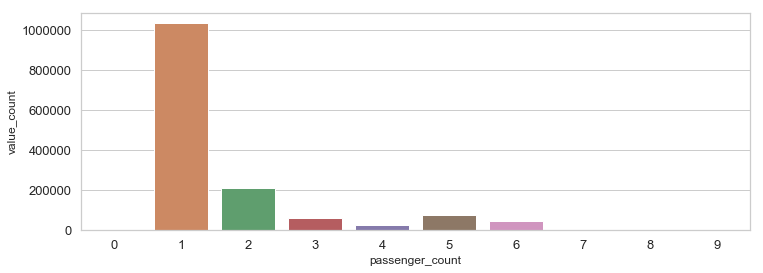

passenger_count   0        1       2      3      4      5      6  7  8  9
value_count      60  1033540  210318  59896  28404  78088  48333  3  1  1

In [56]:
plt.figure(figsize=(12,4))
passenger2_count = train_set.groupby(by="passenger_count").size().reset_index(name="value_count")
sns.barplot(x=passenger2_count["passenger_count"], y=passenger2_count["value_count"], data=passenger2_count)
plt.show()
display(passenger2_count.set_index("passenger_count").T)

chi-square 검정 사용하여 비율이 정말 다른지 살펴보면 유의확률 값이 0에 가까운 값으로 

귀무가설 $H_{0}:\quad\mu_{id=월요일}\quad=\quad\mu_{id=화요일}\quad=\quad\cdots\quad=\quad\mu_{id=일요일}\quad$ 를 기각할 수 있음. 

그러므로 승객수의 운행빈도는 차이가 있으며 통계적으로 유의미하다고 할 수 있음

In [95]:
print("Chi-Test: ", sp.stats.chisquare(train_set.groupby(by="passenger_count").size()))

Chi-Test:  Power_divergenceResult(statistic=6255827.310340289, pvalue=0.0)


------------

### 5) Basic feature : pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
    ① pickup_longitude : the longitude where the meter was engaged
    ② pickup_latitude : the latitude where the meter was engaged
    ③ dropoff_longitude : the longitude where the meter was disengaged
    ④ dropoff_latitude : the latitude where the meter was disengaged

In [3]:
train_pickup_pos = train_set[["pickup_latitude", "pickup_longitude"]]
train_pickup_pos.tail()

pickup_latitude  pickup_longitude
1458639           40.746           -73.982
1458640           40.747           -74.001
1458641           40.769           -73.959
1458642           40.749           -73.982
1458643           40.782           -73.980

In [4]:
train_dropoff_pos = train_set[["dropoff_latitude", "dropoff_longitude"]]
train_dropoff_pos.tail()

dropoff_latitude  dropoff_longitude
1458639            40.740            -73.995
1458640            40.797            -73.970
1458641            40.707            -74.004
1458642            40.757            -73.975
1458643            40.791            -73.973

In [5]:
def add_trip_location(pickup, dropoff):# 오렌지: 출발 .
    
    folium_map = folium.Map(location=[40.738, -73.98], zoom_start=13, tiles="CartoDB dark_matter", width='100%')
    
    for index, row in pickup.iterrows():
        radius = 0.01
        folium.CircleMarker(location=row, radius=1, color="#E37222", fill=True).add_to(folium_map)
    
    for index, row in dropoff.iterrows():
        radius = 0.01
        folium.CircleMarker(location=row, radius=1, color="#0A8A9F", fill=True).add_to(folium_map)
    
    return folium_map

add_trip_location(pickup = train_pickup_pos[:1000], dropoff = train_dropoff_pos[:1000])

⑤ Haversine_distance (euclidean based,in km)

In [121]:
# Haversine_distance(Euclidean based,in km)
train_set['haversine'] = train_set.apply(lambda x: haversine((x["pickup_latitude"], x["pickup_longitude"]),
                                                                      (x["dropoff_latitude"], x["dropoff_longitude"])), axis=1)
test_set['haversine'] = test_set.apply(lambda x: haversine((x["pickup_latitude"], x["pickup_longitude"]),
                                                                      (x["dropoff_latitude"], x["dropoff_longitude"])), axis=1)

<Figure size 1152x576 with 0 Axes>

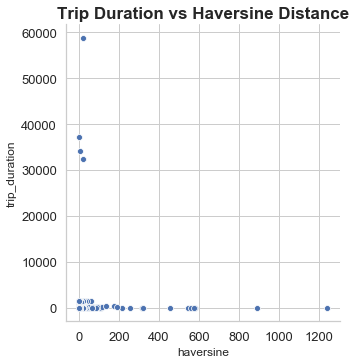

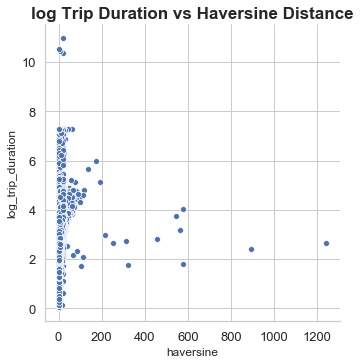

In [64]:
fig = plt.figure(figsize=(16, 8))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)

ax1 = sns.relplot(x="haversine", y="trip_duration", data=train_set[["trip_duration", "haversine"]])
plt.title('Trip Duration vs Haversine Distance', fontsize= 17, fontweight="bold")

ax2 = sns.relplot(x="haversine", y="log_trip_duration", data=train_set[["log_trip_duration", "haversine"]])
plt.title('log Trip Duration vs Haversine Distance', fontsize= 17, fontweight="bold")
plt.show()

In [65]:
print("haversine distance의 median:", np.median(train_set.sort_values(by=["haversine"], ascending=False)["haversine"]))

haversine distance의 median: 2.0937200248919896


In [122]:
trip_duration_min_upper_limit = np.percentile(train_set["trip_duration"], 99.99)
log_trip_duration_min_upper_limit = np.percentile(train_set["log_trip_duration"], 99.99)
haversine_upper_limit = np.percentile(train_set["haversine"], 99.99)

plotdata = train_set[train_set["trip_duration"] < trip_duration_min_upper_limit]
plotdata = plotdata[plotdata["log_trip_duration"] < log_trip_duration_min_upper_limit]
plotdata = plotdata[plotdata["haversine"] < haversine_upper_limit]

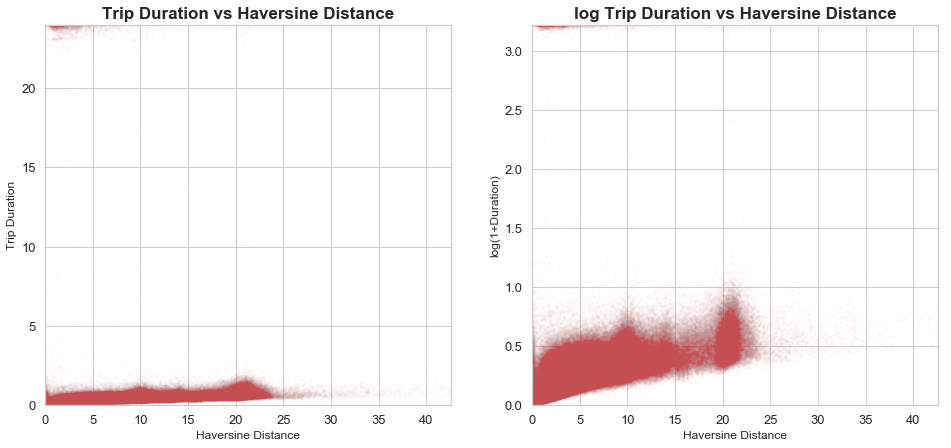

In [123]:
fig, axArray = plt.subplots(nrows=1,ncols=2,figsize=(16, 7))
axArray[0].scatter(plotdata['haversine'], plotdata["trip_duration"], c = "r", s=5, alpha=0.01)
axArray[0].set_xlabel('Haversine Distance')
axArray[0].set_ylabel('Trip Duration')
axArray[0].set_xlim(plotdata['haversine'].min(),plotdata['haversine'].max())
axArray[0].set_ylim(plotdata["trip_duration"].min(),plotdata["trip_duration"].max())
axArray[0].set_title('Trip Duration vs Haversine Distance', fontsize= 17, fontweight="bold")

axArray[1].scatter(plotdata['haversine'], plotdata['log_trip_duration'],c='r',s=5,alpha=0.01) 
axArray[1].set_xlabel('Haversine Distance')
axArray[1].set_ylabel('log(1+Duration)')
axArray[1].set_xlim(plotdata['haversine'].min(),plotdata['haversine'].max())
axArray[1].set_ylim(plotdata['log_trip_duration'].min(),plotdata['log_trip_duration'].max())
axArray[1].set_title('log Trip Duration vs Haversine Distance', fontsize= 17, fontweight="bold")
plt.show()

--------

-----------

### 6) Basic feature : store_and_fwd_flag
- store_and_fwd_flag : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server 
- Y=store and forward; N=not a store and forward trip(범주형)
- store_and_fwd_flag column을 "Yes"인지 "No"로 구분
- 카이제곱 검정을 통해 두 비율간의 차이가 존재함을 검정함

In [68]:
pd.DataFrame(train_set["store_and_fwd_flag"].value_counts())
print("Chi-Test:", sp.stats.chisquare(train_set.groupby(by="store_and_fwd_flag").size()))

Chi-Test: Power_divergenceResult(statistic=1426641.4854590977, pvalue=0.0)


<Figure size 1152x576 with 0 Axes>

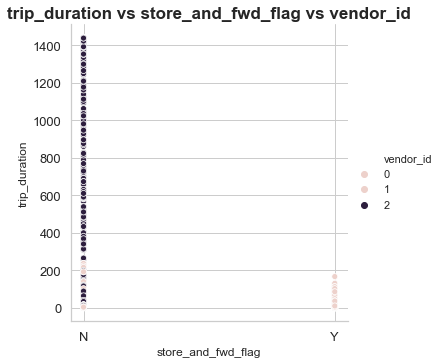

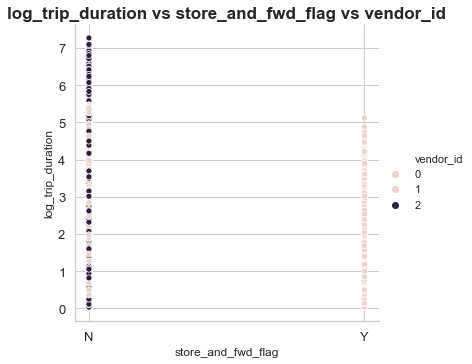

In [70]:
fig = plt.figure(figsize=(16, 8))
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)

ax1 = sns.relplot(x="store_and_fwd_flag", y="trip_duration", hue="vendor_id", data=plotdata[["trip_duration", "store_and_fwd_flag","vendor_id"]])
plt.title("trip_duration vs store_and_fwd_flag vs vendor_id", fontsize= 17, fontweight="bold")

ax2 = sns.relplot(x="store_and_fwd_flag", y="log_trip_duration", hue="vendor_id", data=plotdata[["log_trip_duration", "store_and_fwd_flag","vendor_id"]])
plt.title("log_trip_duration vs store_and_fwd_flag vs vendor_id", fontsize= 17, fontweight="bold")

plt.show()

## 변수들간의 상관관계

#### train_set 변수들의 유형 구분

- 인덱스 : 'id'

- 범주형 : 'vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pickup_m', 'pickup_d', 'pickup_H', 'pickup_M', 'pickup_HMS', 'holiday', 'pickup_level'
    - 순서형 : 'dayofweek'
    
- 연속형 : 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'haversine'

In [124]:
nominal_col = ["id","vendor_id", "passenger_count", "store_and_fwd_flag", "pickup_m", "pickup_d", "dayofweek", "holiday", "pickup_level"]
continuous_col = list(set(train_set.columns).difference(set(nominal_col)))
continuous_col

['pickup_H',
 'pickup_datetime',
 'log_trip_duration',
 'trip_duration',
 'dropoff_datetime',
 'pickup_M',
 'pickup_dHMS',
 'pickup_latitude',
 'pickup_mdHMS',
 'pickup_HMS',
 'dropoff_longitude',
 'pickup_longitude',
 'haversine',
 'dropoff_latitude',
 'pickup_Y']

- 연속형 변수들간의 상관관계

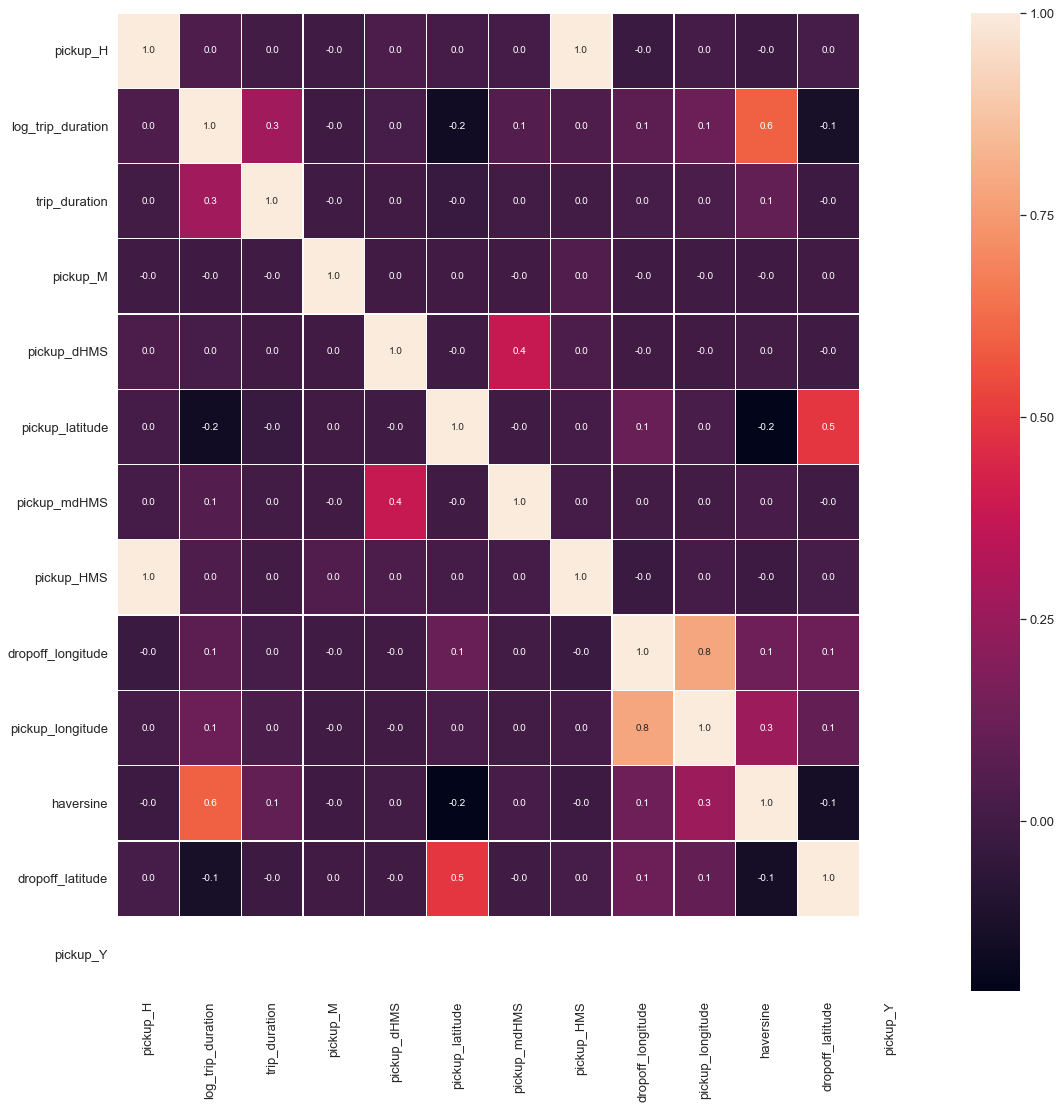

In [72]:
%matplotlib inline

train_set_corr = train_set[continuous_col].corr()
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_set_corr, annot=True, linewidths=.3, fmt='.1f', ax=ax)
plt.show()

- 범주형 변수들간의 상관관계

In [125]:
nominal_col = ["vendor_id", "passenger_count", "store_and_fwd_flag", "pickup_m", "pickup_d", "dayofweek", "holiday", "pickup_level"]

아래의 결과로서 유의수준 5%하에 귀무가설을 기각할 수 없어서 출력 변수들은 서로 상관관계가 없다고 할 수 있다.

In [74]:
k = 0
while True:
    for i in range(k+1, len(nominal_col)):
        result = sp.stats.chi2_contingency(pd.crosstab(train_set[nominal_col[k]], train_set[nominal_col[i]]))[1]
        if result > 0.05:
            print("{}과 {}는 상관관계가 없다! chi-test의 결과 p-value:{}".format(nominal_col[k], nominal_col[i], result))
    
    k += 1
    if k == len(nominal_col)-1:
        break

vendor_id과 pickup_d는 상관관계가 없다! chi-test의 결과 p-value:0.21306845942606376


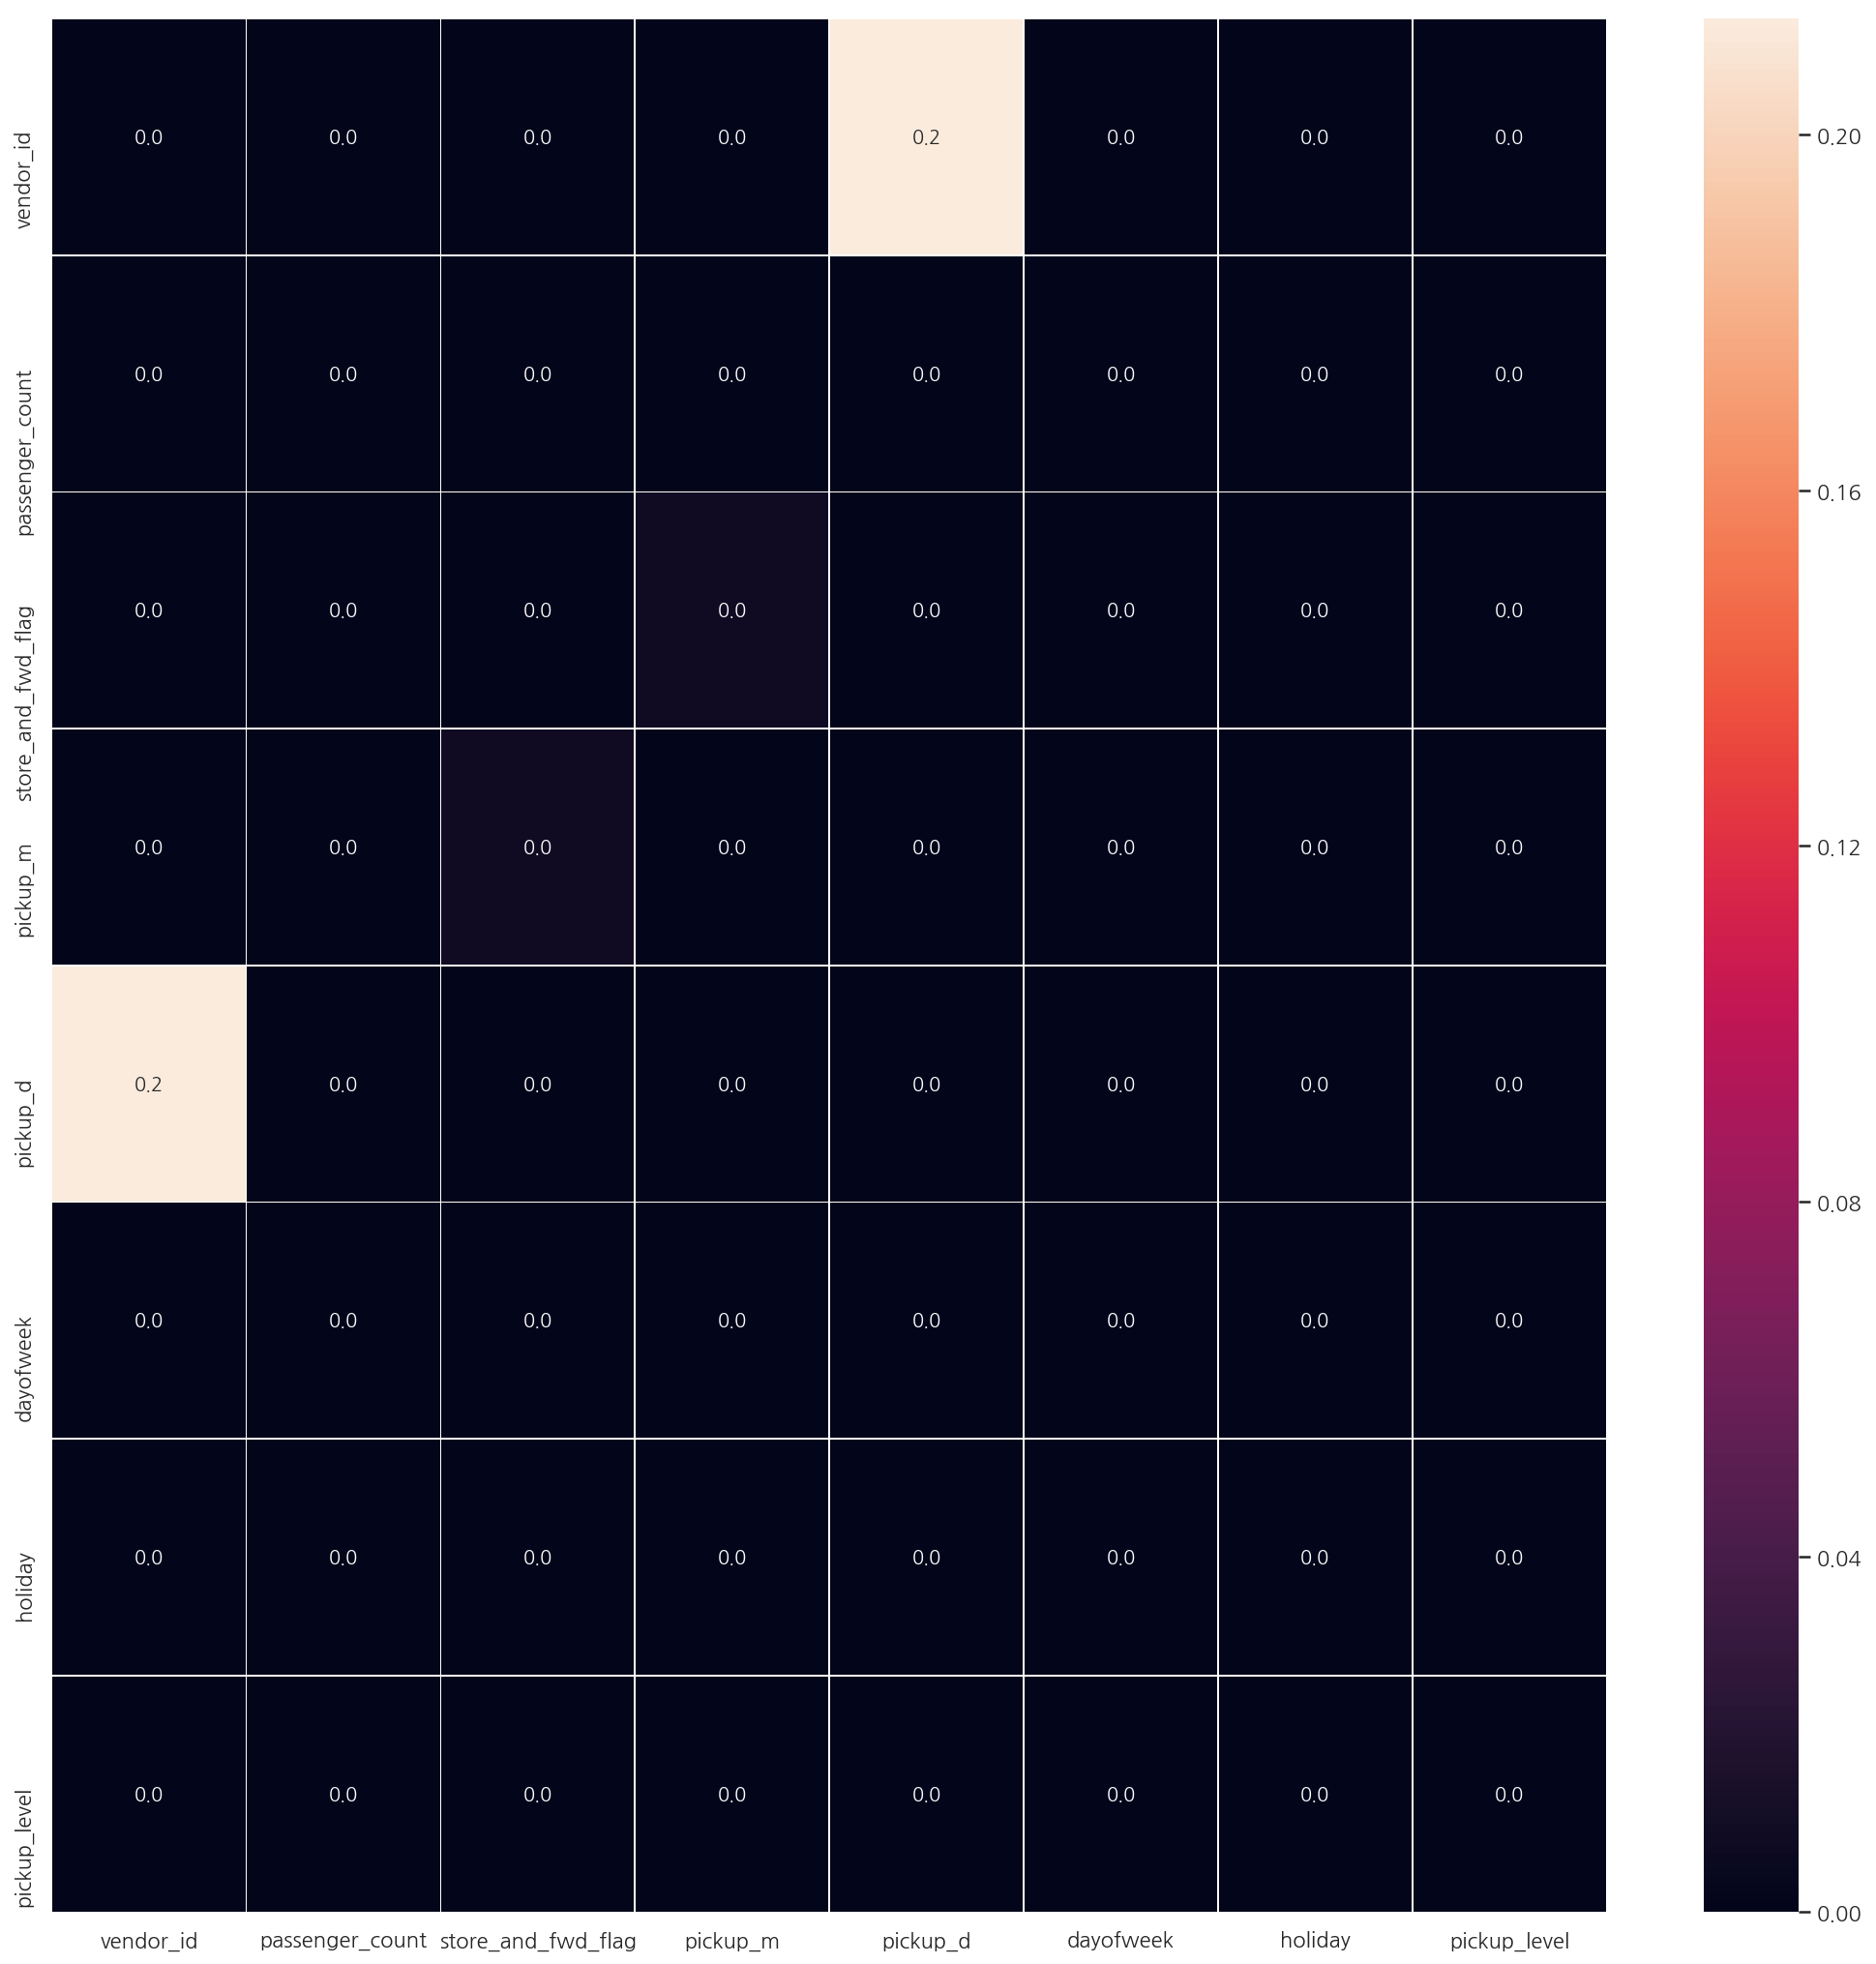

In [319]:
chi_heatmap = pd.DataFrame(index=nominal_col, columns=nominal_col)

for i, m in enumerate(nominal_col):
    for j, k in enumerate(nominal_col):
        chi_heatmap.loc[m, k] = sp.stats.chi2_contingency(pd.crosstab(train_set[nominal_col[i]], train_set[nominal_col[j]]))[1]
        
        
chi_heatmap = chi_heatmap.astype(float)

%matplotlib inline
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(chi_heatmap, annot=True, linewidths=.3, fmt='.1f', ax=ax)
plt.show()

------

### OLS Regression

#### 1번째 모델

In [78]:
model1 = sm.OLS.from_formula("trip_duration ~ C(vendor_id) + C(passenger_count) + C(store_and_fwd_flag) + C(pickup_m)\
+ C(pickup_d) + C(holiday) + C(pickup_level) + I(np.sin(I(2*np.pi*dayofweek/7))) + I(np.cos(I(2*np.pi*dayofweek/7))) + pickup_latitude\
+ pickup_longitude + dropoff_longitude + dropoff_latitude + pickup_HMS + haversine + 0", data=train_set)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     252.0
Date:                Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:32:19   Log-Likelihood:            -8.5816e+06
No. Observations:             1458644   AIC:                         1.716e+07
Df Residuals:                 1458586   BIC:                         1.716e+07
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

위의 리포트에서 다중공선성이 큰 변수가 존재한다는 점과 조건수가 크다는 문제를 확인하여 우선적으로 scaling을 통해 조건수를 줄여준다.

#### 2번째 모델

In [130]:
model2 = sm.OLS.from_formula("I(np.log1p(trip_duration)) ~ C(vendor_id) + C(passenger_count) + C(store_and_fwd_flag)\
+ C(pickup_m) + C(pickup_d) + C(holiday) + C(pickup_level) + scale(I(np.sin(I(2*np.pi*dayofweek/7))))\
+ scale(I(np.cos(I(2*np.pi*dayofweek/7))))+ scale(pickup_latitude) + scale(pickup_longitude)\
+ scale(dropoff_longitude) + scale(dropoff_latitude) + scale(pickup_HMS) + scale(haversine) + 0", data=train_set)
result2 = model2.fit()
print(result2.summary())

                                OLS Regression Results                                
Dep. Variable:     I(np.log1p(trip_duration))   R-squared:                       0.306
Model:                                    OLS   Adj. R-squared:                  0.306
Method:                         Least Squares   F-statistic:                 1.127e+04
Date:                        Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                                21:46:55   Log-Likelihood:             7.5061e+05
No. Observations:                     1458644   AIC:                        -1.501e+06
Df Residuals:                         1458586   BIC:                        -1.500e+06
Df Model:                                  57                                         
Covariance Type:                    nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------

모형1과 모형2의 조건수를 비교해보면 336,000에서 1700으로 많이 떨어지긴 했지만, 여전히 큰 조건수를 가지며 강한 다중공선성을 가지고있다고 판단할 수 있다. 그러므로 VIF를 계산하여 제일 강한 다중공선성이 있는 것들을 확인해본다.

## VIF - 다중공선성 문제 해결하기

In [8]:
dfX = train_set[list(set(train_set.columns).difference(set(["trip_duration","log_trip_duration","id"])))]

In [9]:
dfX.columns

Index(['haversine', 'passenger_count', 'pickup_level', 'pickup_HMS',
       'pickup_latitude', 'holiday', 'dayofweek', 'pickup_longitude',
       'vendor_id', 'pickup_m', 'store_and_fwd_flag', 'dropoff_longitude',
       'dropoff_latitude', 'pickup_d'],
      dtype='object')

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values(by=["VIF Factor"], ascending=False).reset_index(drop=True)
vif

VIF Factor            features
0   2.936619e+06    pickup_longitude
1   2.740300e+06   dropoff_longitude
2   1.682605e+06     pickup_latitude
3   1.477456e+06    dropoff_latitude
4   9.211537e+00          pickup_HMS
5   9.191105e+00        pickup_level
6   7.289638e+00           dayofweek
7   5.392831e+00            pickup_m
8   4.174838e+00            pickup_d
9   3.058862e+00             holiday
10  2.841726e+00     passenger_count
11  2.358826e+00           vendor_id
12  1.716970e+00           haversine
13  1.012791e+00  store_and_fwd_flag

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values(by=["VIF Factor"], ascending=False).reset_index(drop=True)
vif

VIF Factor            features
0   2.936619e+06    pickup_longitude
1   2.740300e+06   dropoff_longitude
2   1.682605e+06     pickup_latitude
3   1.477456e+06    dropoff_latitude
4   9.211537e+00          pickup_HMS
5   9.191105e+00        pickup_level
6   7.289638e+00           dayofweek
7   5.392831e+00            pickup_m
8   4.174838e+00            pickup_d
9   3.058862e+00             holiday
10  2.841726e+00     passenger_count
11  2.358826e+00           vendor_id
12  1.716970e+00           haversine
13  1.012791e+00  store_and_fwd_flag

VIF 값이 제일 큰 pickup_longitude, dropoff_longitude, pickup_latitude, dropoff_latitude를 제외하고 모형을 다시 만들어본다.

#### 3번쩨 모델

In [11]:
model3 = sm.OLS.from_formula("I(np.log1p(trip_duration)) ~ C(vendor_id) + C(passenger_count) + C(store_and_fwd_flag) + C(pickup_m)\
+ C(pickup_d) + C(holiday) + C(pickup_level) + scale(I(np.sin(I(2*np.pi*dayofweek/7)))) + scale(I(np.cos(I(2*np.pi*dayofweek/7)))) +\
scale(pickup_HMS) + scale(haversine) + 0", data=train_set)
result3 = model3.fit()
print(result3.summary())

                                OLS Regression Results                                
Dep. Variable:     I(np.log1p(trip_duration))   R-squared:                       0.374
Model:                                    OLS   Adj. R-squared:                  0.374
Method:                         Least Squares   F-statistic:                 1.642e+04
Date:                        Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                                16:25:08   Log-Likelihood:            -1.1984e+06
No. Observations:                     1458644   AIC:                         2.397e+06
Df Residuals:                         1458590   BIC:                         2.398e+06
Df Model:                                  53                                         
Covariance Type:                    nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------

조건수가 20정도 떨어지긴 했지만, 큰 차이는 없다.
VIF계산을 통해 제거한 변수를 제외하고 다시 한번 다중공선성 체크를 해본다.

In [13]:
dfX = train_set[list(set(train_set.columns).difference(set(["trip_duration","log_trip_duration","id",\
                                                            "pickup_longitude", "dropoff_longitude", "pickup_latitude", "dropoff_latitude"])))]

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values(by=["VIF Factor"], ascending=False).reset_index(drop=True)
vif

VIF Factor            features
0    8.642436          pickup_HMS
1    8.542838        pickup_level
2    6.403471           dayofweek
3    4.233954            pickup_m
4    3.530912            pickup_d
5    3.023946             holiday
6    2.721188     passenger_count
7    2.297703           vendor_id
8    1.594637           haversine
9    1.011885  store_and_fwd_flag

이번에는 상대적으로 훨씬 큰 VIF값을 갖는 변수가 존재하지 않기 때문에, 월과 일 변수를 하나로 합쳐 'pickup_Ymd'라는 칼럼을 새로 생성하고 다시 비교해보기로 한다.

In [4]:
model_add = pd.read_csv("train.csv")

In [5]:
model_add2 = pd.read_csv("test.csv")

In [6]:
model_add["pickup_datetime"] = pd.to_datetime(model_add["pickup_datetime"])
model_add["pickup_Ymd"] = model_add["pickup_datetime"].apply(lambda x: x.year + x.month/12 + x.day/365)

In [7]:
model_add2["pickup_datetime"] = pd.to_datetime(model_add2["pickup_datetime"])
test_set["pickup_Ymd"] = model_add2["pickup_datetime"].apply(lambda x: x.year + x.month/12 + x.day/365)

In [8]:
train_set["pickup_Ymd"] = model_add["pickup_Ymd"]

In [18]:
train_set.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'log_trip_duration', 'pickup_m',
       'pickup_d', 'pickup_HMS', 'dayofweek', 'holiday', 'pickup_level',
       'haversine', 'pickup_Ymd'],
      dtype='object')

#### 4번째 모델

In [9]:
model4 = sm.OLS.from_formula("I(np.log1p(trip_duration)) ~ C(vendor_id) + C(passenger_count) + C(store_and_fwd_flag) + C(pickup_level) \
+ C(holiday) + scale(I(np.sin(I(2*np.pi*dayofweek/7)))) + scale(I(np.cos(I(2*np.pi*dayofweek/7)))) +\
scale(pickup_HMS) + scale(haversine) + scale(I(np.sin(I(2*np.pi*pickup_Ymd/365)))) + scale(I(np.cos(I(2*np.pi*pickup_Ymd/365)))) + 0", data=train_set)
result4 = model4.fit()
print(result4.summary())

                                OLS Regression Results                                
Dep. Variable:     I(np.log1p(trip_duration))   R-squared:                       0.373
Model:                                    OLS   Adj. R-squared:                  0.373
Method:                         Least Squares   F-statistic:                 4.348e+04
Date:                        Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                                18:52:02   Log-Likelihood:            -1.1986e+06
No. Observations:                     1458644   AIC:                         2.397e+06
Df Residuals:                         1458623   BIC:                         2.398e+06
Df Model:                                  20                                         
Covariance Type:                    nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

위 OLS 결과를 보면 passenger_count의 수가 7,8,9명인 컬럼이 유의미하지 않아 보인다. 이는 승객이 7,8,9명인 경우가 1~6명인 경우에 비해 훨씬 적기 때문인 것으로 판단된다. 그래서 7,8,9인 컬럼을 6으로 통합해 `이제부터는 passenger_count가 6이 의미하는 바는 승객수가 6명 이상인 경우`로 변경하겠다.

In [11]:
train_set["passenger_count"] = train_set["passenger_count"].apply(lambda x : 6 if (x==7 or x==8 or x==9) else x)

#### 5번째 모델

In [12]:
model5 = sm.OLS.from_formula("I(np.log1p(trip_duration)) ~ C(vendor_id) + C(passenger_count) + C(store_and_fwd_flag) + C(pickup_level) \
+ C(holiday) + scale(I(np.sin(I(2*np.pi*dayofweek/7)))) + scale(I(np.cos(I(2*np.pi*dayofweek/7)))) +\
scale(pickup_HMS) + scale(haversine) + scale(I(np.sin(I(2*np.pi*pickup_Ymd/365)))) + scale(I(np.cos(I(2*np.pi*pickup_Ymd/365)))) + 0", data=train_set)
result5 = model5.fit()
print(result5.summary())

                                OLS Regression Results                                
Dep. Variable:     I(np.log1p(trip_duration))   R-squared:                       0.373
Model:                                    OLS   Adj. R-squared:                  0.373
Method:                         Least Squares   F-statistic:                 5.115e+04
Date:                        Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                                19:08:22   Log-Likelihood:            -1.1986e+06
No. Observations:                     1458644   AIC:                         2.397e+06
Df Residuals:                         1458626   BIC:                         2.398e+06
Df Model:                                  17                                         
Covariance Type:                    nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

scaling, 다중공선성 문제를 처리하고 승객수 변수를 조정한 후 조건수가 상당히 낮아졌다. 하지만 여전히 r-square가 낮아서 성능을 높이기 위해 아웃라이어를 체크해본다.

## 아웃라이어 확인 및 처리

In [14]:
dfX = train_set[list(set(train_set.columns).difference(set(["trip_duration", "log_trip_duration", "id","pickup_m"
                                                            "pickup_d", "pickup_longitude", "dropoff_longitude", 
                                                            "pickup_latitude", "dropoff_latitude"])))]

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


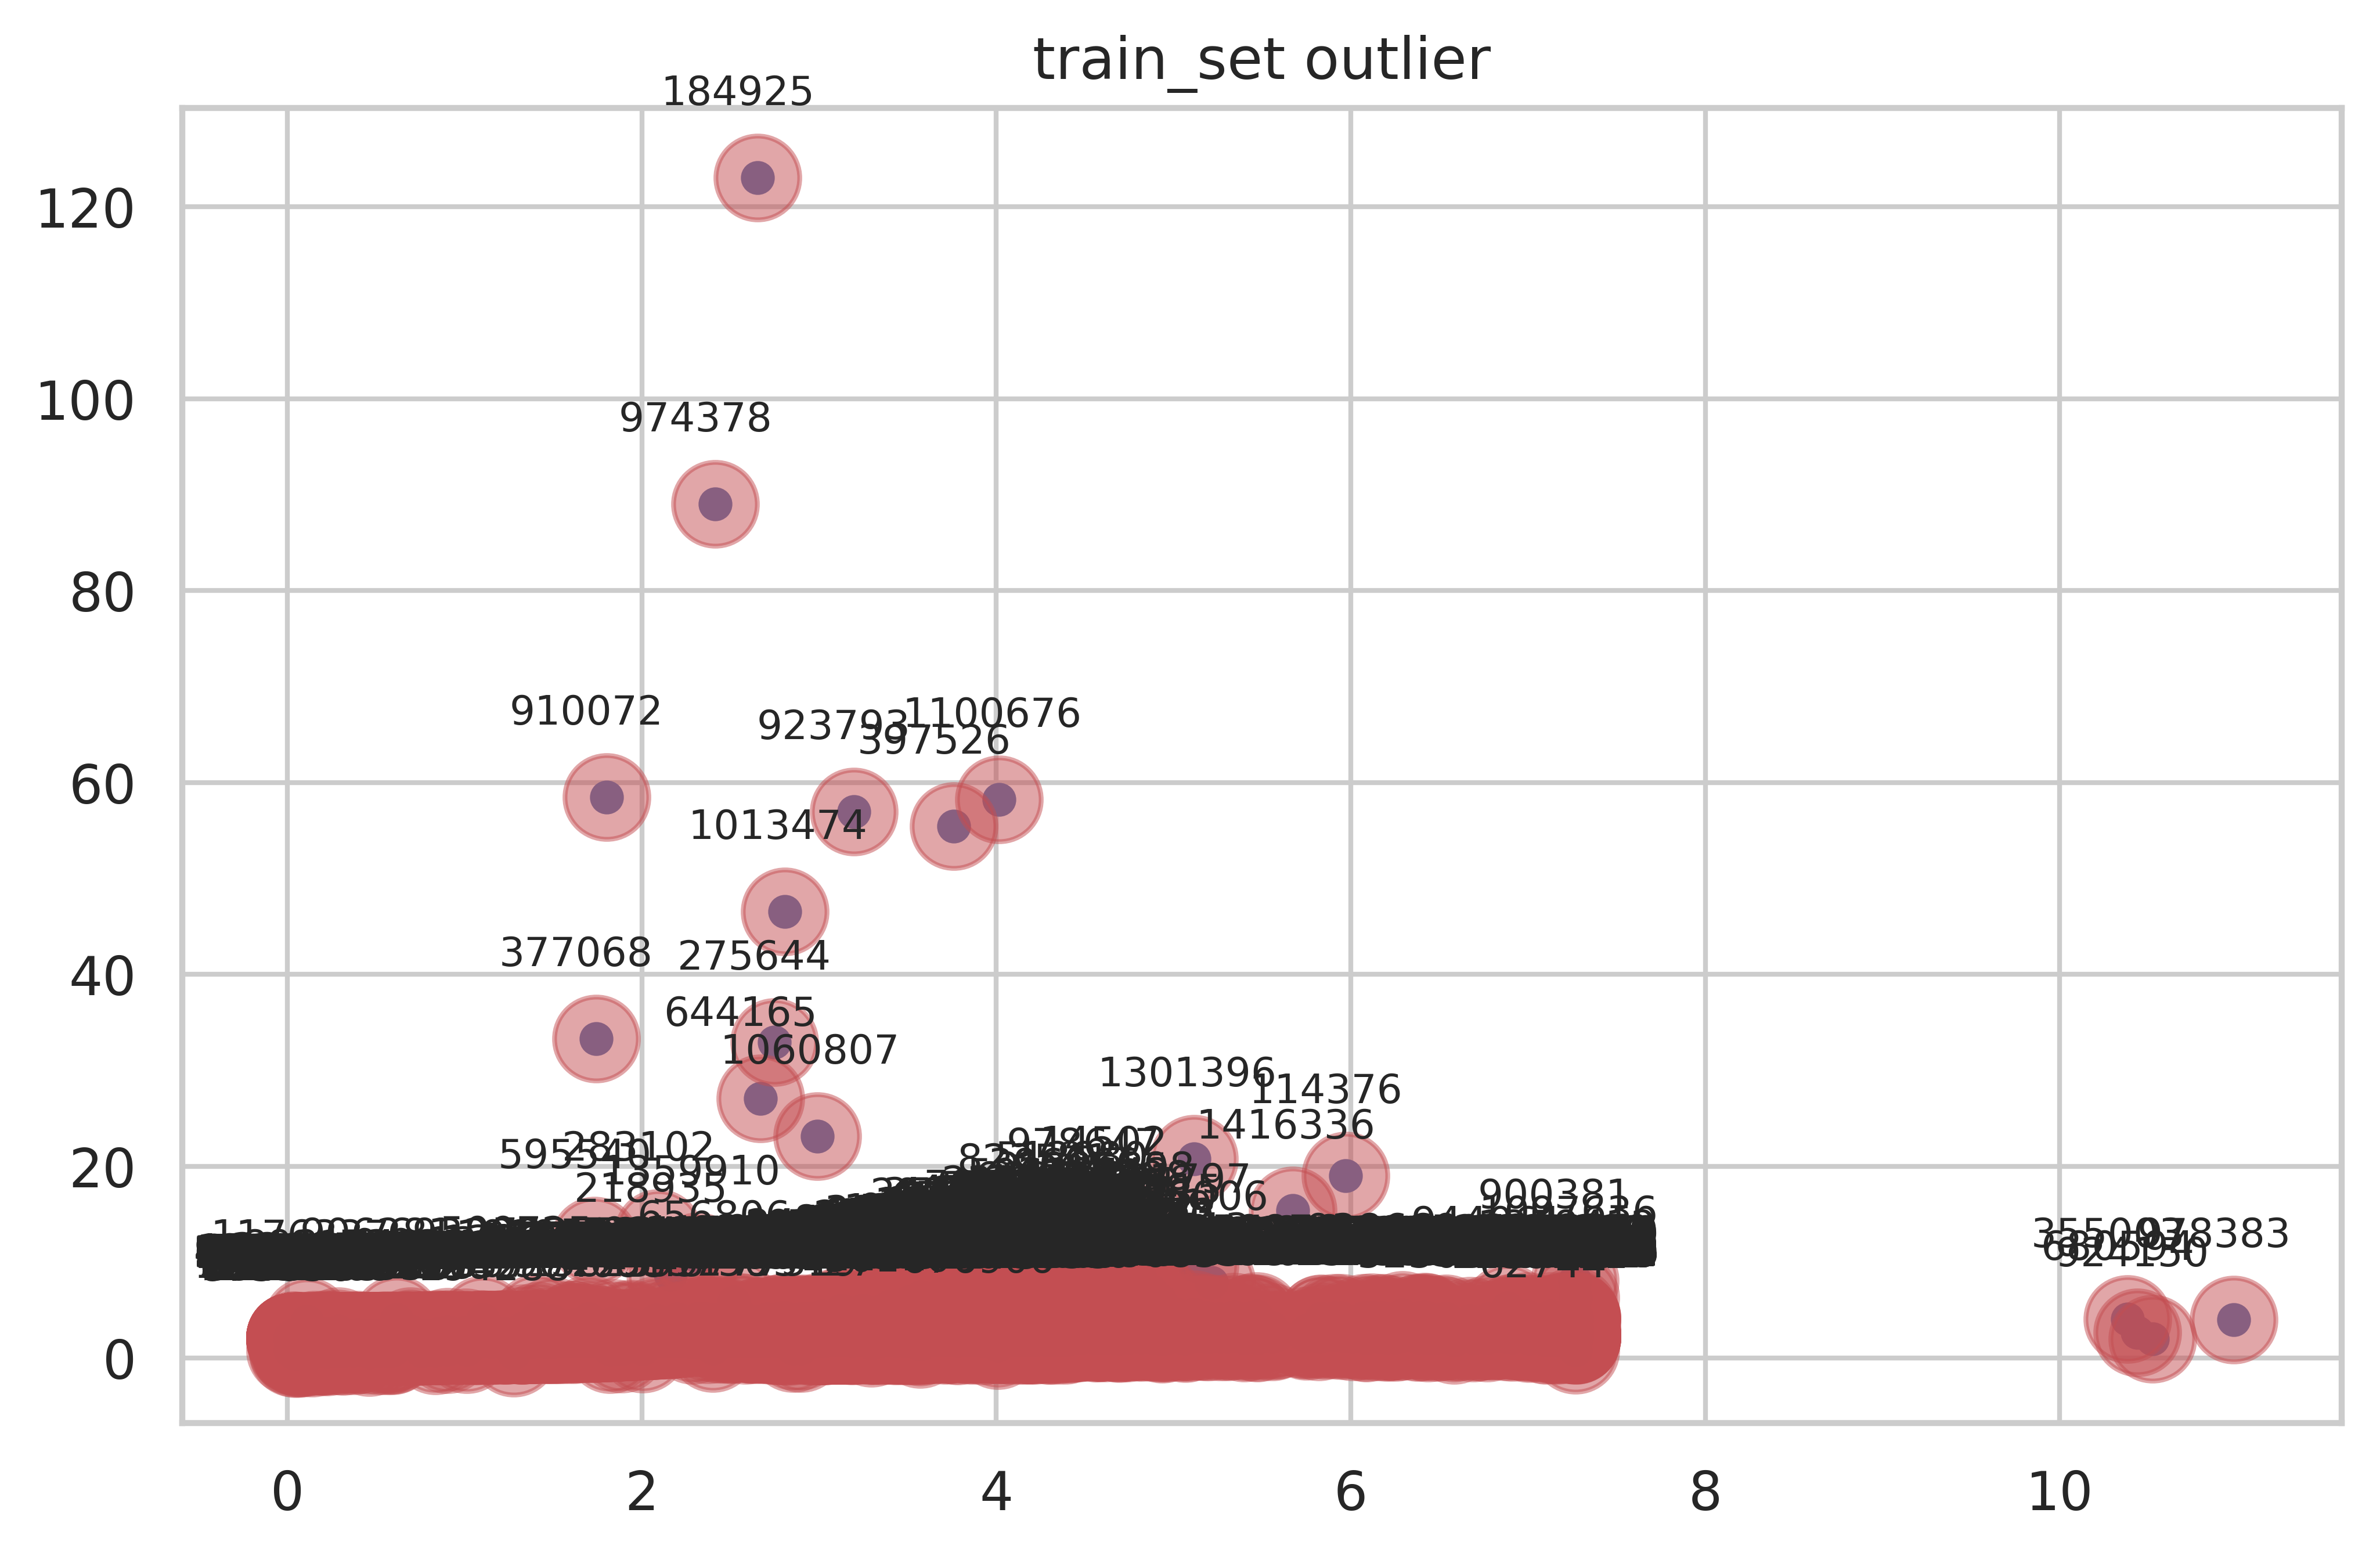

<Figure size 15000x9000 with 0 Axes>

In [15]:
from statsmodels.graphics import utils
pred = result5.predict(dfX)

influence_model5 = result5.get_influence()
cooks_d2, pvals = influence_model5.cooks_distance
fox_cr = 4 / (len(dfX) - 18)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(train_set.log_trip_duration, pred)
plt.scatter(train_set.log_trip_duration[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                    list(zip(train_set.log_trip_duration[idx], pred[idx])), [(-20, 15)] * len(idx), 
                    size="small", ax=ax)
plt.title("train_set outlier")
plt.figure(figsize=(50,30))
plt.show()

아웃라이어의 개수를 체크해보니 44781개가 된다.

In [35]:
# fox-recomendation으로 선택한 아웃라이어의 갯수
len(idx)

44781

아웃라이어에 해당하는 데이터들만 따로 모아 테이블을 만들어본다. 

In [23]:
modeling_set = train_set.copy()

In [24]:
outlier_group = modeling_set.loc[list(idx)]

In [25]:
outlier_group.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  44781.000000     44781.000000      44781.000000     44781.000000   
mean       1.615261         2.873317        -73.959443        40.746470   
std        0.486539         1.829650          0.082500         0.084071   
min        1.000000         0.000000        -79.569733        34.712234   
25%        1.000000         1.000000        -73.990311        40.733505   
50%        2.000000         3.000000        -73.978210        40.753551   
75%        2.000000         4.000000        -73.957268        40.769661   
max        2.000000         6.000000        -66.972160        51.881084   

       dropoff_longitude  dropoff_latitude  store_and_fwd_flag  trip_duration  \
count       44781.000000      44781.000000        44781.000000   44781.000000   
mean          -73.963507         40.752945            0.087537      81.308184   
std             0.107419          0.077947            0.282624     490.154672   
min           -80.355431         32.181141            0.000000       0.016667   
25%           -73.990158         40.736217            0.000000       1.450000   
50%           -73.977654         40.755455            0.000000       3.166667   
75%           -73.955833         40.773022            0.000000      29.883333   
max           -69.048019         43.921028            1.000000   58771.366667   

       log_trip_duration      pickup_m      pickup_d    pickup_HMS  \
count       44781.000000  44781.000000  44781.000000  44781.000000   
mean            2.165845      3.607490     15.709363     13.295273   
std             1.713514      1.767125      8.749770      7.077798   
min             0.016529      1.000000      1.000000      0.000000   
25%             0.896088      2.000000      8.000000      7.873611   
50%             1.427116      4.000000     16.000000     14.257500   
75%             3.430217      5.000000     23.000000     19.327778   
max            10.981427      6.000000     31.000000     23.999722   

          dayofweek       holiday     haversine    pickup_Ymd  
count  44781.000000  44781.000000  44781.000000  44781.000000  
mean       3.065273      0.310511      3.982804   2016.343664  
std        1.955902      0.462708     12.159411      0.150441  
min        0.000000      0.000000      0.000000   2016.086073  
25%        1.000000      0.000000      0.419973   2016.210502  
50%        3.000000      0.000000      0.927574   2016.349772  
75%        5.000000      1.000000      3.231718   2016.476941  
max        6.000000      1.000000   1240.910391   2016.582192

이번에는 아웃라이어를 제외한 나머지 데이터들만 뽑아 테이블을 만들어본다.

In [26]:
non_idx = list(set(list(modeling_set.index)).difference(set(list(idx))))

In [27]:
non_outlier_group = modeling_set.loc[non_idx]

In [28]:
non_outlier_group.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.413863e+06     1.413863e+06      1.413863e+06     1.413863e+06   
mean   1.532407e+00     1.626238e+00     -7.397393e+01     4.075106e+01   
std    4.989489e-01     1.275973e+00      7.045766e-02     2.984812e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399191e+01     4.073744e+01   
50%    2.000000e+00     1.000000e+00     -7.398182e+01     4.075411e+01   
75%    2.000000e+00     2.000000e+00     -7.396764e+01     4.076832e+01   
max    2.000000e+00     6.000000e+00     -6.133553e+01     4.391176e+01   

       dropoff_longitude  dropoff_latitude  store_and_fwd_flag  trip_duration  \
count       1.413863e+06      1.413863e+06        1.413863e+06   1.413863e+06   
mean       -7.397373e+01      4.075176e+01        2.917539e-03   1.392278e+01   
std         6.913658e-02      3.371136e-02        5.393541e-02   1.059674e+01   
min        -1.219333e+02      3.435970e+01        0.000000e+00   3.666667e-01   
25%        -7.399135e+01      4.073587e+01        0.000000e+00   6.783333e+00   
50%        -7.397982e+01      4.075449e+01        0.000000e+00   1.110000e+01   
75%        -7.396325e+01      4.076971e+01        0.000000e+00   1.775000e+01   
max        -6.133553e+01      4.391176e+01        1.000000e+00   1.612667e+02   

       log_trip_duration      pickup_m      pickup_d    pickup_HMS  \
count       1.413863e+06  1.413863e+06  1.413863e+06  1.413863e+06   
mean        2.498884e+00  3.513946e+00  1.549751e+01  1.413358e+01   
std         6.343176e-01  1.678159e+00  8.701578e+00  6.381166e+00   
min         3.123747e-01  1.000000e+00  1.000000e+00  0.000000e+00   
25%         2.051985e+00  2.000000e+00  8.000000e+00  9.601944e+00   
50%         2.493205e+00  4.000000e+00  1.500000e+01  1.478611e+01   
75%         2.931194e+00  5.000000e+00  2.300000e+01  1.948639e+01   
max         5.089241e+00  6.000000e+00  3.100000e+01  2.399972e+01   

          dayofweek       holiday     haversine    pickup_Ymd  
count  1.413863e+06  1.413863e+06  1.413863e+06  1.413863e+06  
mean   3.049903e+00  3.038342e-01  3.423704e+00  2.016335e+03  
std    1.953979e+00  4.599121e-01  3.788485e+00  1.414533e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00  2.016086e+03  
25%    1.000000e+00  0.000000e+00  1.262146e+00  2.016213e+03  
50%    3.000000e+00  0.000000e+00  2.118134e+00  2.016336e+03  
75%    5.000000e+00  1.000000e+00  3.887330e+00  2.016455e+03  
max    6.000000e+00  1.000000e+00  3.148757e+01  2.016582e+03

In [29]:
dfX1 = outlier_group[list(set(outlier_group.columns).difference(set(["trip_duration", "log_trip_duration", "id",
                                                                     "pickup_m", "pickup_d", "pickup_longitude", 
                                                                     "dropoff_longitude", "pickup_latitude", 
                                                                     "dropoff_latitude"])))]

In [30]:
predict_outlier_group = result5.predict(dfX1)

In [31]:
(predict_outlier_group - outlier_group.trip_duration).describe()

count    44781.000000
mean       -78.765621
std        490.133301
min     -58767.328254
25%        -26.841216
50%         -0.877547
75%          0.731430
max        109.863031
dtype: float64

In [36]:
group1 = (predict_outlier_group - outlier_group.trip_duration)

In [37]:
res_mean_25per = np.percentile(group1, 25)
res_mean_75per = np.percentile(group1, 75)

In [38]:
# 잔차의 평균으로부터 1시그마 안에있는 것들만 뽑아온다.
group1 = group1[group1 < res_mean_75per]
group1 = group1[res_mean_25per < group1]

In [39]:
group1.index

Int64Index([    122,     149,     199,     226,     232,     348,     437,
                483,     526,     566,
            ...
            1458019, 1458070, 1458110, 1458172, 1458206, 1458257, 1458264,
            1458273, 1458335, 1458367],
           dtype='int64', length=22389)

In [40]:
group2 = (predict_outlier_group - outlier_group.trip_duration)

In [41]:
idx_outlier = list(set(list(group2.index)).difference(set(list(group1))))

In [42]:
idx_data = list(set(list(modeling_set.index)).difference(set(list(idx_outlier))))

In [43]:
modeling_set = modeling_set.loc[idx_data]

In [44]:
modeling_set.to_csv("modeling_set.csv")

#### 아웃라이어 제거 후 6번째 모델

In [112]:
model6 = sm.OLS.from_formula("I(np.log1p(trip_duration)) ~ C(vendor_id) + C(passenger_count) + C(store_and_fwd_flag)\
+ C(pickup_level) + C(holiday) + scale(I(np.sin(I(2*np.pi*dayofweek/7)))) + scale(I(np.cos(I(2*np.pi*dayofweek/7))))\
+scale(pickup_HMS) + scale(haversine) + scale(I(np.sin(I(2*np.pi*pickup_Ymd/365)))) \
+ scale(I(np.cos(I(2*np.pi*pickup_Ymd/365)))) + 0", data=modeling_set)
result6 = model6.fit()
print(result6.summary())

                                OLS Regression Results                                
Dep. Variable:     I(np.log1p(trip_duration))   R-squared:                       0.505
Model:                                    OLS   Adj. R-squared:                  0.505
Method:                         Least Squares   F-statistic:                 8.480e+04
Date:                        Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                                17:31:02   Log-Likelihood:            -8.6566e+05
No. Observations:                     1413863   AIC:                         1.731e+06
Df Residuals:                         1413845   BIC:                         1.732e+06
Df Model:                                  17                                         
Covariance Type:                    nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

아웃라이어 제거 후 r-squared 값은 많이 올랐음을 확인할 수 있다. 그런데 조건수 문제가 다시 발생했으므로 다중공선성을 체크해본다.

In [113]:
dfX = train_set[list(set(train_set.columns).difference(set(["trip_duration","log_trip_duration","id",'pickup_m',
                                                            'pickup_d', "pickup_longitude", "dropoff_longitude",
                                                            "pickup_latitude", "dropoff_latitude"])))]

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values(by=["VIF Factor"], ascending=False).reset_index(drop=True)
vif

VIF Factor            features
0   13.371942          pickup_Ymd
1    9.208607          pickup_HMS
2    9.172847        pickup_level
3    7.283211           dayofweek
4    3.051460             holiday
5    2.841739     passenger_count
6    2.358515           vendor_id
7    1.646667           haversine
8    1.012777  store_and_fwd_flag

제거해줄만큼 다중공선성이 큰 변수가 없다고 판단되어 그대로 두고, 이 모형에 대해 정규성검정을 실시해보겠다.

### 모형의 정규성 검정
- 위의 과정을 통해 형성된 모델의 정규성 확인
- 우리가 선택한 모델의 정규성을 확인하기 위해 이론적 분포와, 우리가 만든 모델에서 파생되는 잔차들의 분포를 확인한다



<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'holiday residual plot')

((array([-4.89551203, -4.71814882, -4.62232836, ...,  4.62232836,
          4.71814882,  4.89551203]),
  array([-1.81207754, -1.80650802, -1.80273562, ...,  1.84520789,
          1.86805131,  1.9186723 ])),
 (0.4455221343764542, -2.8664089504975225e-15, 0.9981617056638894))

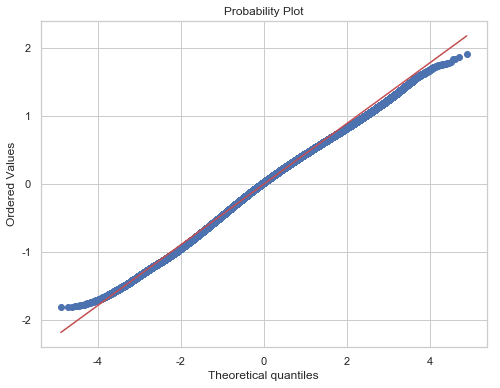

In [92]:
plt.figure(figsize=(50,30))
plt.title("holiday residual plot",fontsize=12)
sp.stats.probplot(result6.resid, plot=plt)
plt.show()

### 연속변수들의 잔차 그래프

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'dayofweek residual plot')

Text(0.5, 0, 'dayofweek')

Text(0, 0.5, 'Residual')

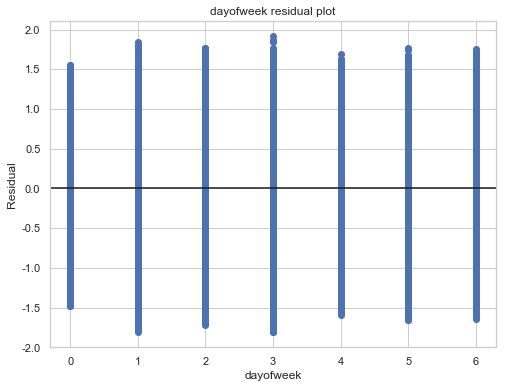

In [90]:
plt.figure(figsize=(50,30))
plt.plot(dfX["dayofweek"], result6.resid, 'o')
plt.title("dayofweek residual plot",fontsize=12)
plt.axhline(y=0, c='k')
plt.xlabel("dayofweek",fontsize=12)
plt.ylabel("Residual",fontsize=12)
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'holiday residual plot')

Text(0.5, 0, 'holiday')

Text(0, 0.5, 'Residual')

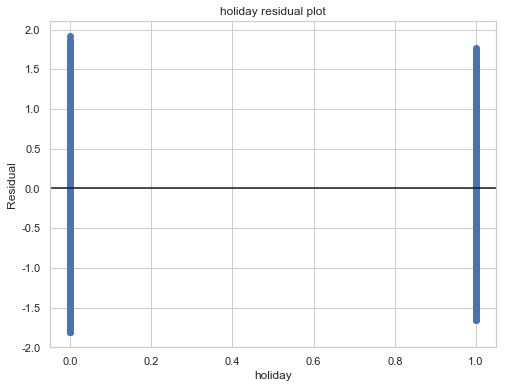

In [91]:
plt.figure(figsize=(8, 6))
plt.plot(dfX["holiday"], result6.resid, 'o')
plt.axhline(y=0, c='k')
plt.title("holiday residual plot",fontsize=12)
plt.xlabel("holiday")
plt.ylabel("Residual")
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'vendor_id residual plot')

Text(0.5, 0, 'vendor_id')

Text(0, 0.5, 'Residual')

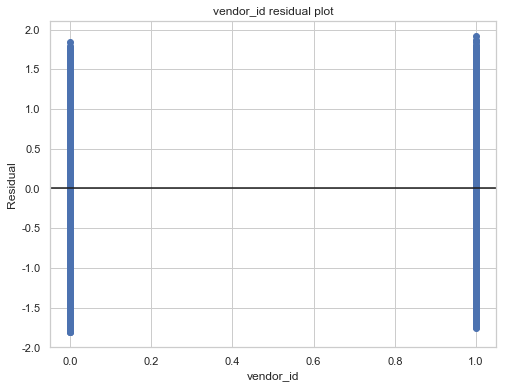

In [96]:
plt.figure(figsize=(8, 6))
plt.plot(dfX["vendor_id"], result6.resid, 'o')
plt.axhline(y=0, c='k')
plt.title("vendor_id residual plot", fontsize=12)
plt.xlabel("vendor_id")
plt.ylabel("Residual")
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'haversine residual plot')

Text(0.5, 0, 'haversine')

Text(0, 0.5, 'Residual')

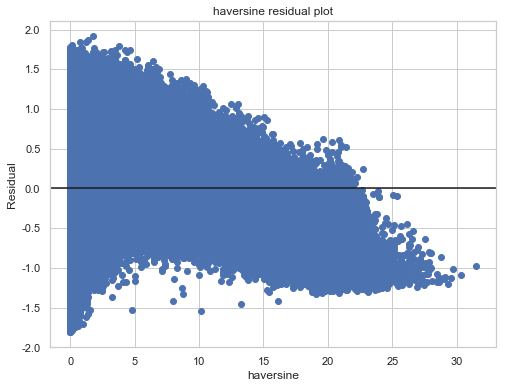

In [118]:
plt.figure(figsize=(8, 6))
plt.plot(dfX["haversine"], result6.resid, 'o')
plt.axhline(y=0, c='k')
plt.title("haversine residual plot",fontsize=12)
plt.xlabel("haversine")
plt.ylabel("Residual")
plt.show()

Text(0.5, 1.0, 'pickup_level residual plot')

Text(0.5, 0, 'pickup_level')

Text(0, 0.5, 'Residual')

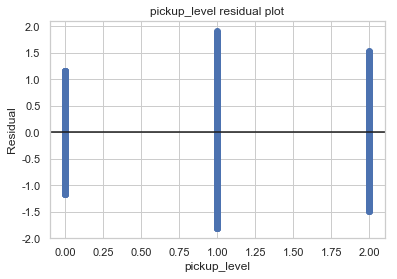

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(dfX["pickup_level"], result6.resid, 'o')
plt.axhline(y=0, c='k')
plt.title("pickup_level residual plot",fontsize=12)
plt.xlabel("pickup_level")
plt.ylabel("Residual")
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'pickup_level residual plot(zoom-in)')

Text(0.5, 0, 'pickup_level')

Text(0, 0.5, 'Residual')

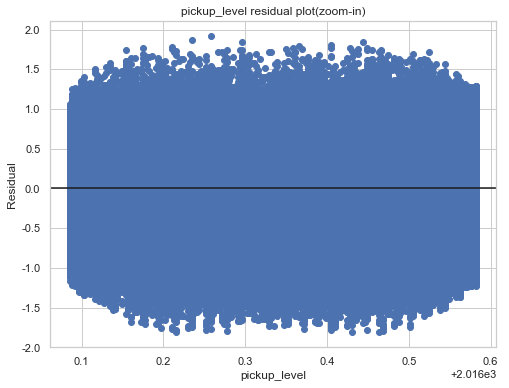

In [103]:
plt.figure(figsize=(8, 6))
plt.title("pickup_level residual plot(zoom-in)",fontsize=12)
plt.plot(dfX['pickup_Ymd'], result6.resid, 'o')
plt.axhline(y=0, c='k')

plt.xlabel("pickup_level")
plt.ylabel("Residual")
plt.show()

#### 7번째 모델
- 위의 과정을 통해 haversine을 제외한 수치형 변수들이 잔차의 평균값이 0에 근접함을 확인
- EDA과정에서 확인했던 haversine거리와 log(1+trip_duration)의 관계가가 sqrt(haversine)모습임을 확인
- haversine을 sqrt(haversine)으로 변환하여 새로운 모델링을 시도

In [101]:
model7 = sm.OLS.from_formula("I(np.log1p(trip_duration)) ~ C(vendor_id) + C(passenger_count) + C(pickup_level) \
+ C(holiday) + scale(I(np.sin(I(2*np.pi*dayofweek/7)))) + scale(I(np.cos(I(2*np.pi*dayofweek/7)))) +\
scale(pickup_HMS) + scale(I(np.sqrt(haversine))) + scale(I(np.sin(I(2*np.pi*pickup_Ymd/365)))) + scale(I(np.cos(I(2*np.pi*pickup_Ymd/365)))) + 0", data=modeling_set)
result7 = model7.fit()
print(result7.summary())

                                OLS Regression Results                                
Dep. Variable:     I(np.log1p(trip_duration))   R-squared:                       0.617
Model:                                    OLS   Adj. R-squared:                  0.617
Method:                         Least Squares   F-statistic:                 1.424e+05
Date:                        Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                                19:27:33   Log-Likelihood:            -6.8402e+05
No. Observations:                     1413863   AIC:                         1.368e+06
Df Residuals:                         1413846   BIC:                         1.368e+06
Df Model:                                  16                                         
Covariance Type:                    nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

- 결정계수: 대폭상승 (0.505-> 0.617)
- 조건수: 변동없음 (4.76e+03->4.76e+03)

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'haversine residual plot(zoom-in)')

Text(0.5, 0, 'haversine')

Text(0, 0.5, 'Residual')

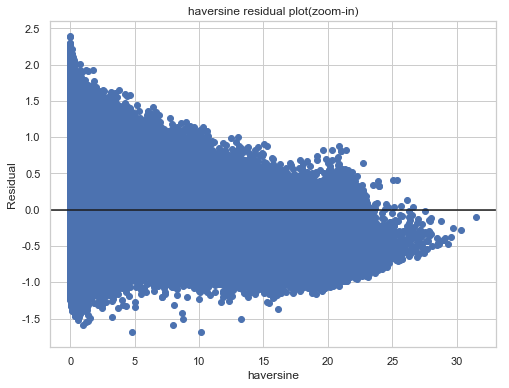

In [104]:
plt.figure(figsize=(8, 6))
plt.title("haversine residual plot(zoom-in)",fontsize=12)
plt.plot(dfX["haversine"], result7.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("haversine")
plt.ylabel("Residual")
plt.show()

#### 8번째 모델

In [240]:
model8 = sm.OLS.from_formula("I(np.log1p(trip_duration)) ~ C(vendor_id) + C(pickup_level) \
+ C(holiday) + scale(I(np.sin(I(2*np.pi*dayofweek/7)))) + scale(I(np.cos(I(2*np.pi*dayofweek/7)))) +\
scale(pickup_HMS) + scale(I(np.sqrt(haversine))) + scale(I(np.sin(I(2*np.pi*pickup_Ymd/365)))) + scale(I(np.cos(I(2*np.pi*pickup_Ymd/365)))) + 0", data=modeling_set)
result8 = model8.fit()
print(result8.summary())

                                OLS Regression Results                                
Dep. Variable:     I(np.log1p(trip_duration))   R-squared:                       0.599
Model:                                    OLS   Adj. R-squared:                  0.599
Method:                         Least Squares   F-statistic:                 2.109e+05
Date:                        Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                                21:15:01   Log-Likelihood:            -8.6553e+05
No. Observations:                     1413863   AIC:                         1.731e+06
Df Residuals:                         1413852   BIC:                         1.731e+06
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

- 상대적으로 p-value값이 크게 나타난 passenger_count를 제외한 후 모델링
- 결정계수: 소폭 하락(0.617->0.616)
- 조건수: 대폭 하락 (4.76e+03 2.70e+02)
- passenger_count의 영향력이 크지 않음을 확인

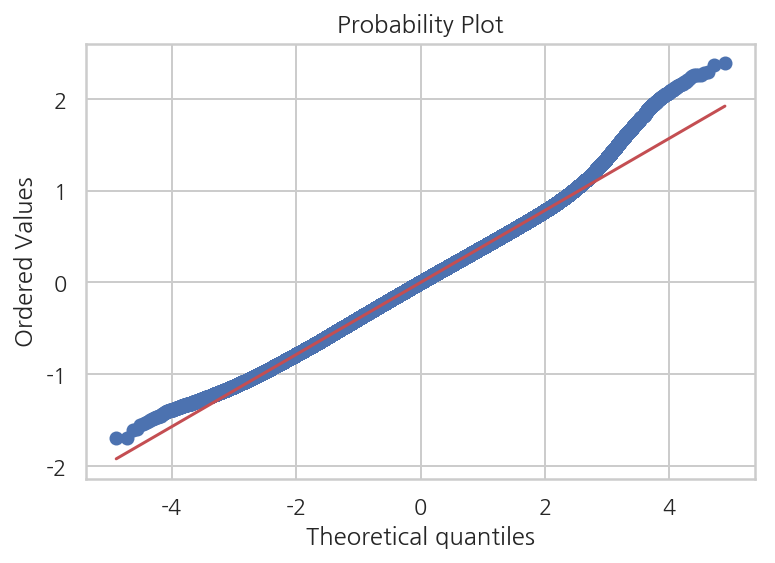

In [141]:
sp.stats.probplot(result8.resid, plot=plt)
plt.show()

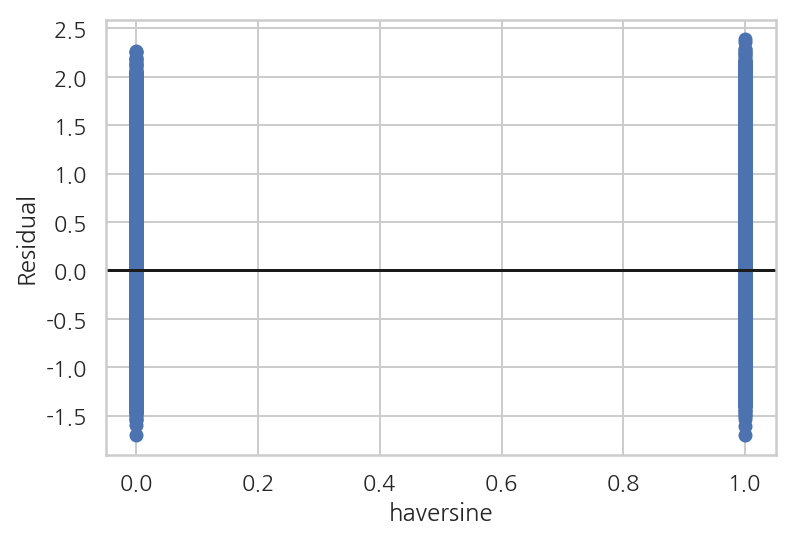

In [142]:
plt.plot(dfX["vendor_id"], result8.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("haversine")
plt.ylabel("Residual")
plt.show()

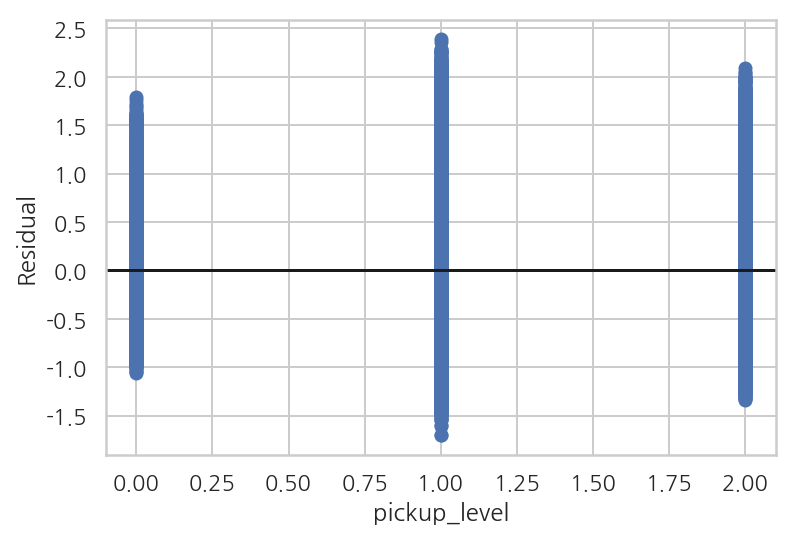

In [143]:
plt.plot(dfX["pickup_level"], result8.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("pickup_level")
plt.ylabel("Residual")
plt.show()

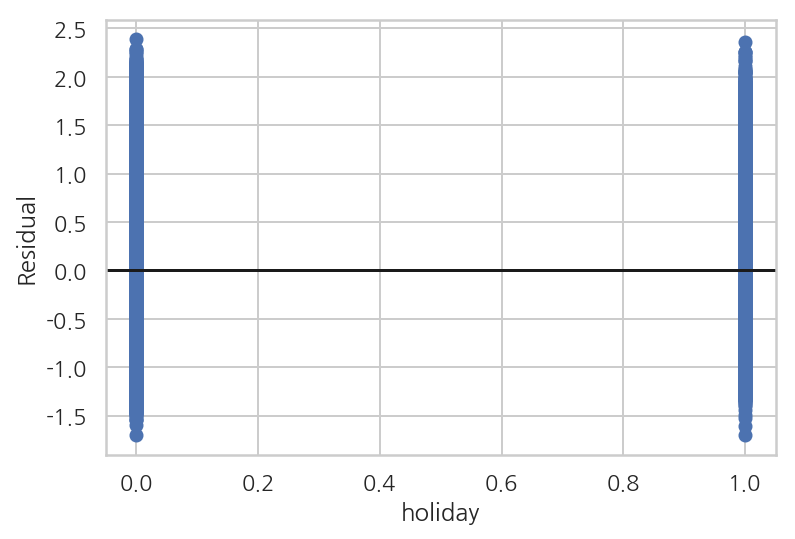

In [145]:
plt.plot(dfX["holiday"], result8.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("holiday")
plt.ylabel("Residual")
plt.show()

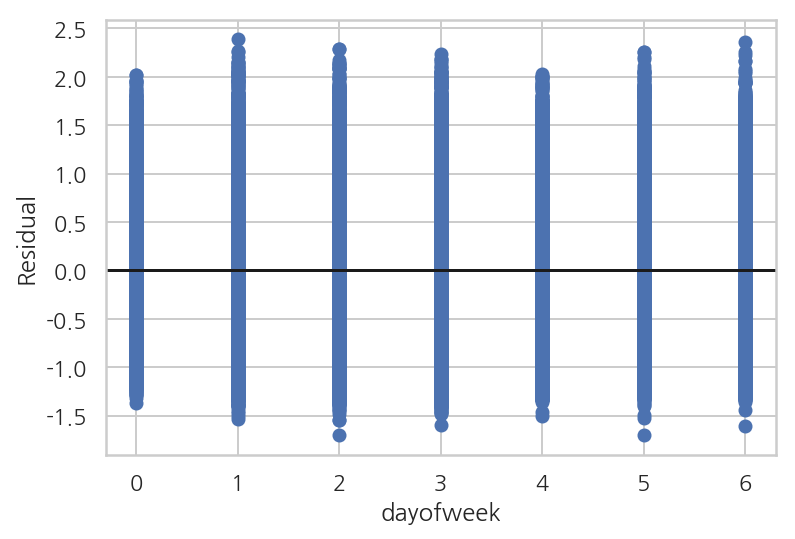

In [146]:
plt.plot(dfX["dayofweek"], result8.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("dayofweek")
plt.ylabel("Residual")
plt.show()

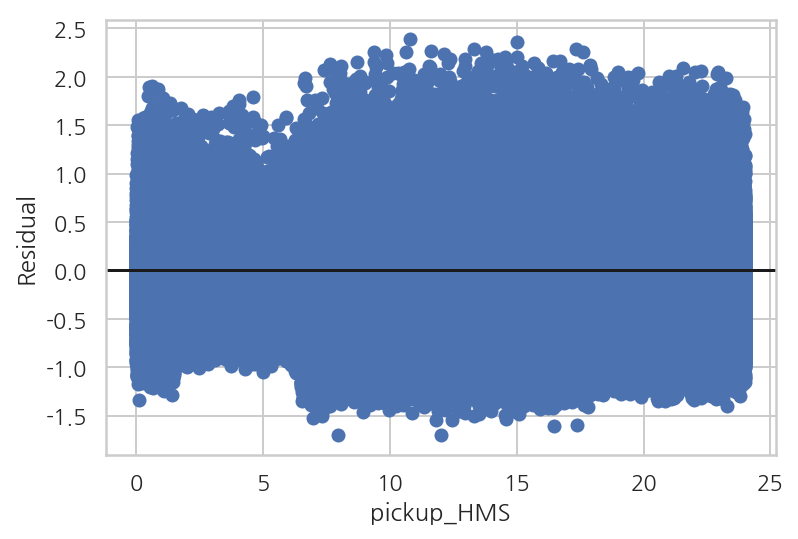

In [147]:
plt.plot(dfX["pickup_HMS"], result8.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("pickup_HMS")
plt.ylabel("Residual")
plt.show()

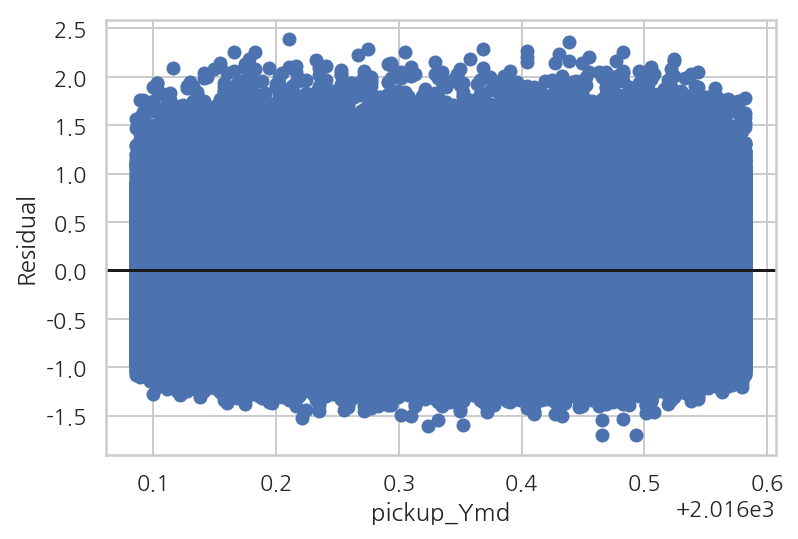

In [148]:
plt.plot(dfX["pickup_Ymd"], result8.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("pickup_Ymd")
plt.ylabel("Residual")
plt.show()

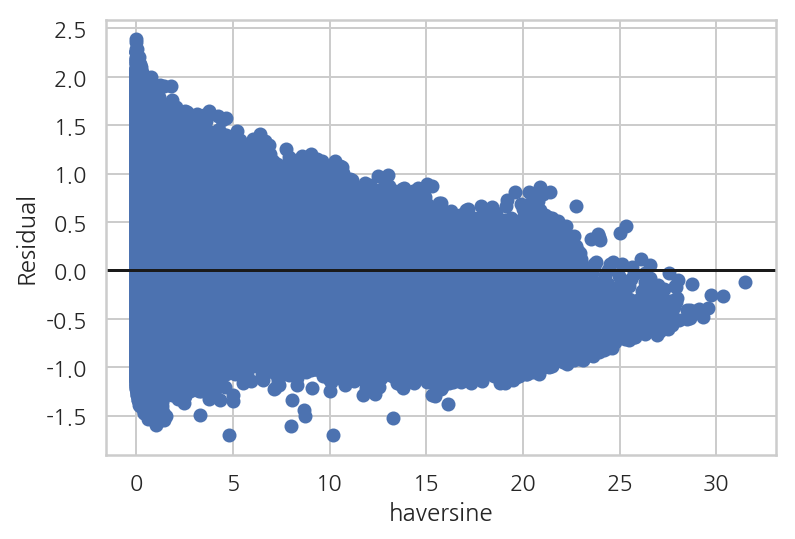

In [139]:
plt.plot(dfX["haversine"], result8.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("haversine")
plt.ylabel("Residual")
plt.show()

In [151]:
trip_duration_min_upper_limit = np.percentile(train_set["trip_duration"], 99.99)
log_trip_duration_min_upper_limit = np.percentile(train_set["log_trip_duration"], 99.99)
haversine_upper_limit = np.percentile(train_set["haversine"], 99.99)

plotdata = train_set[train_set["trip_duration"] < trip_duration_min_upper_limit]
plotdata = plotdata[plotdata["log_trip_duration"] < log_trip_duration_min_upper_limit]
plotdata = plotdata[plotdata["haversine"] < haversine_upper_limit]

In [154]:
plotdata["haversine_sqrt"] = np.sqrt(plotdata.haversine)

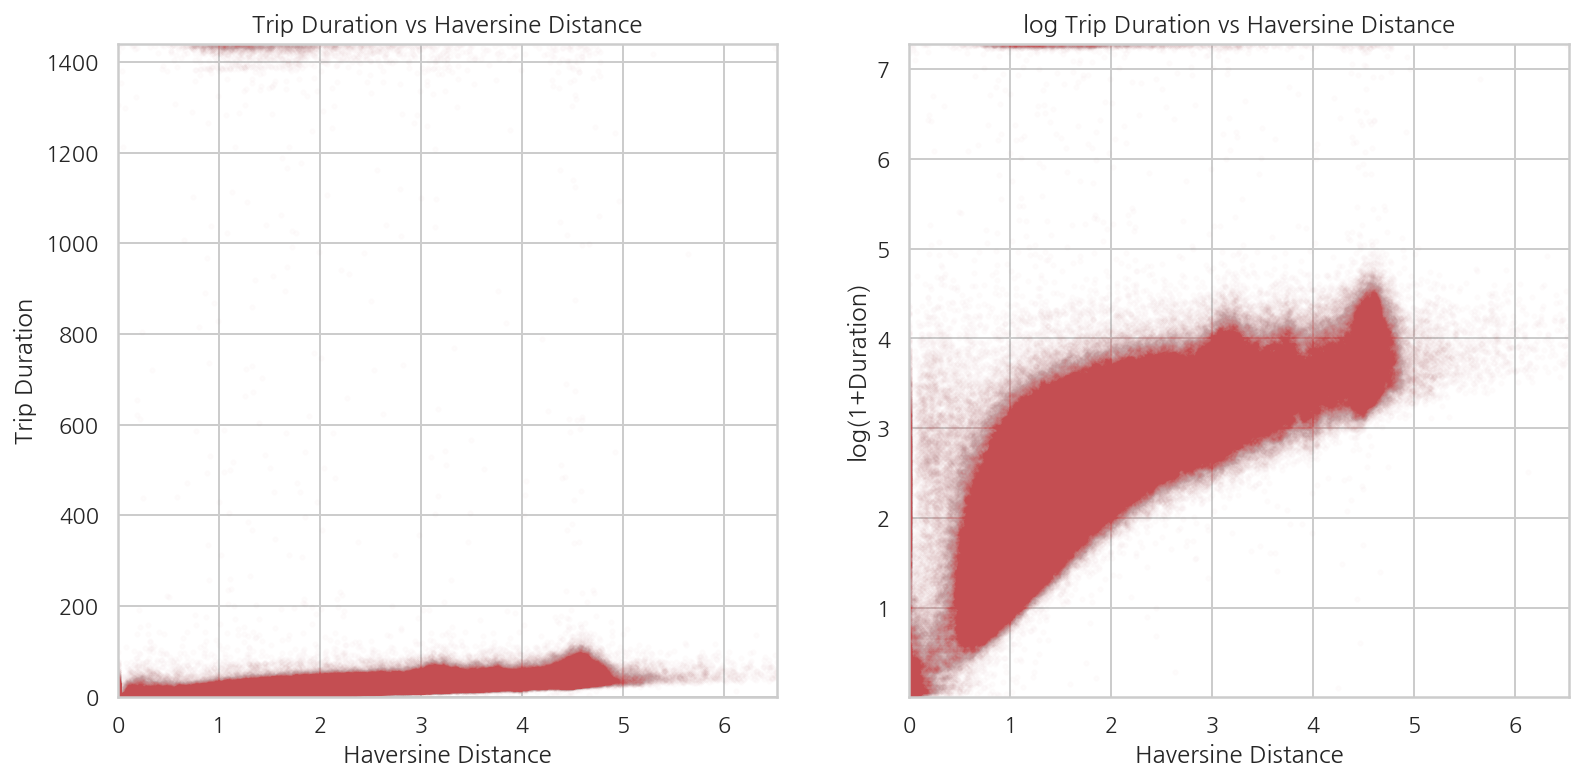

In [156]:
fig, axArray = plt.subplots(nrows=1,ncols=2,figsize=(13,6))
axArray[0].scatter(plotdata["haversine_sqrt"], plotdata["trip_duration"], c = "r", s=5, alpha=0.01)
axArray[0].set_xlabel('Haversine Distance')
axArray[0].set_ylabel('Trip Duration')
axArray[0].set_xlim(plotdata["haversine_sqrt"].min(),plotdata["haversine_sqrt"].max())
axArray[0].set_ylim(plotdata["trip_duration"].min(),plotdata["trip_duration"].max())
axArray[0].set_title('Trip Duration vs Haversine Distance')

axArray[1].scatter(plotdata["haversine_sqrt"], plotdata['log_trip_duration'],c='r',s=5,alpha=0.01) 
axArray[1].set_xlabel('Haversine Distance')
axArray[1].set_ylabel('log(1+Duration)')
axArray[1].set_xlim(plotdata["haversine_sqrt"].min(),plotdata["haversine_sqrt"].max())
axArray[1].set_ylim(plotdata['log_trip_duration'].min(),plotdata['log_trip_duration'].max())
axArray[1].set_title('log Trip Duration vs Haversine Distance')
plt.show()

In [200]:
modeling_set["trip_duration"] = modeling_set["trip_duration"]*60

In [201]:
model9 = sm.OLS.from_formula("I(np.log1p(trip_duration)) ~ C(vendor_id) + C(pickup_level) \
+ C(holiday) + scale(I(np.sin(I(2*np.pi*dayofweek/7)))) + scale(I(np.cos(I(2*np.pi*dayofweek/7)))) +\
scale(pickup_HMS) + scale(I(np.sqrt(np.sqrt(haversine))-1)) + scale(I(np.sin(I(2*np.pi*pickup_Ymd/365)))) + scale(I(np.cos(I(2*np.pi*pickup_Ymd/365)))) + 0", data=modeling_set)
result9 = model9.fit()
print(result9.summary())

                                OLS Regression Results                                
Dep. Variable:     I(np.log1p(trip_duration))   R-squared:                       0.617
Model:                                    OLS   Adj. R-squared:                  0.617
Method:                         Least Squares   F-statistic:                 2.274e+05
Date:                        Fri, 16 Nov 2018   Prob (F-statistic):               0.00
Time:                                19:37:31   Log-Likelihood:            -8.3300e+05
No. Observations:                     1413863   AIC:                         1.666e+06
Df Residuals:                         1413852   BIC:                         1.666e+06
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

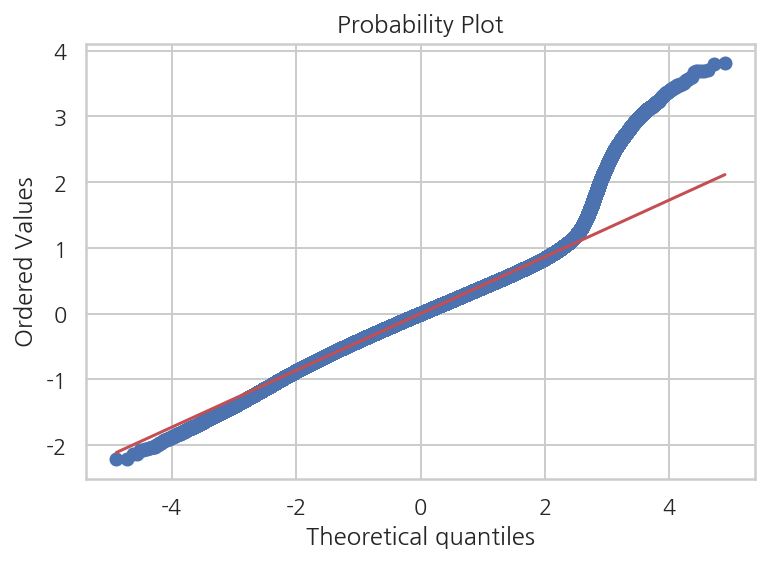

In [202]:
sp.stats.probplot(result9.resid, plot=plt)
plt.show()

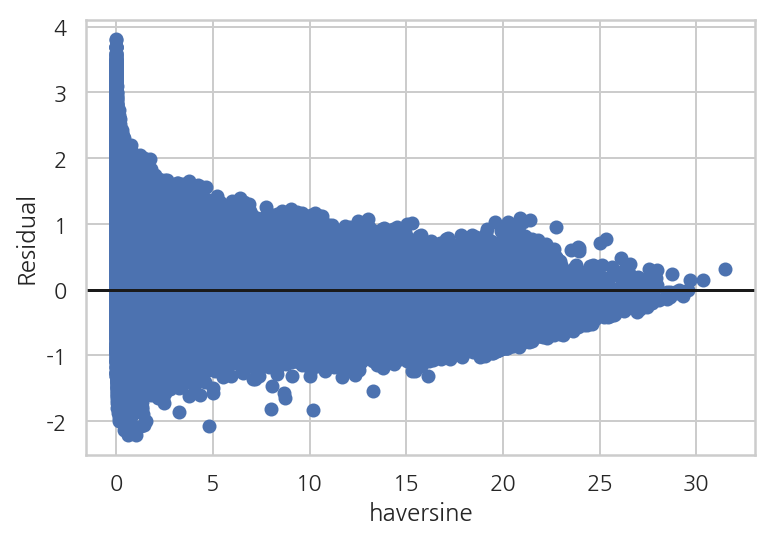

In [203]:
plt.plot(dfX["haversine"], result9.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("haversine")
plt.ylabel("Residual")
plt.show()

## 교차검증

In [182]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm

class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data)

In [183]:
modeling_set1 = modeling_set[['vendor_id', 'trip_duration', 'pickup_HMS', 'dayofweek', 'holiday', 'pickup_level','haversine', 'pickup_Ymd']]

In [198]:
dfX1 = modeling_set[list(set(modeling_set.columns).difference(set(["trip_duration"])))]

In [215]:
dfX = modeling_set1[['vendor_id', 'pickup_HMS', 'dayofweek', 'holiday', 'pickup_level','haversine', 'pickup_Ymd']]

In [216]:
dfy = modeling_set1[['trip_duration']]

In [210]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(modeling_set1)):
    df_train = modeling_set1.iloc[idx_train]
    df_test = modeling_set1.iloc[idx_test]
    
    model = sm.OLS.from_formula("I(np.log1p(trip_duration)) ~ C(vendor_id) + C(pickup_level) \
+ C(holiday) + scale(I(np.sin(I(2*np.pi*dayofweek/7)))) + scale(I(np.cos(I(2*np.pi*dayofweek/7)))) +\
scale(pickup_HMS) + scale(I(np.sqrt(haversine))) + scale(I(np.sin(I(2*np.pi*pickup_Ymd/365)))) +\
scale(I(np.cos(I(2*np.pi*pickup_Ymd/365)))) + 0", data=modeling_set1)
    result = model.fit()
    
    pred = result.predict(df_test)
    pred = np.exp(pred)-1
    rss = ((df_test.trip_duration - pred) ** 2).sum()
    tss = ((df_test.trip_duration - df_test.trip_duration.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("train R2 = {:.8f}, test R2 = {:.8f}".format(result.rsquared, rsquared))

train R2 = 0.61643300, test R2 = 0.53891104
train R2 = 0.61643300, test R2 = 0.53772588
train R2 = 0.61643300, test R2 = 0.54238781
train R2 = 0.61643300, test R2 = 0.54036714
train R2 = 0.61643300, test R2 = 0.54409421


## 정규화 선형회귀

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0001


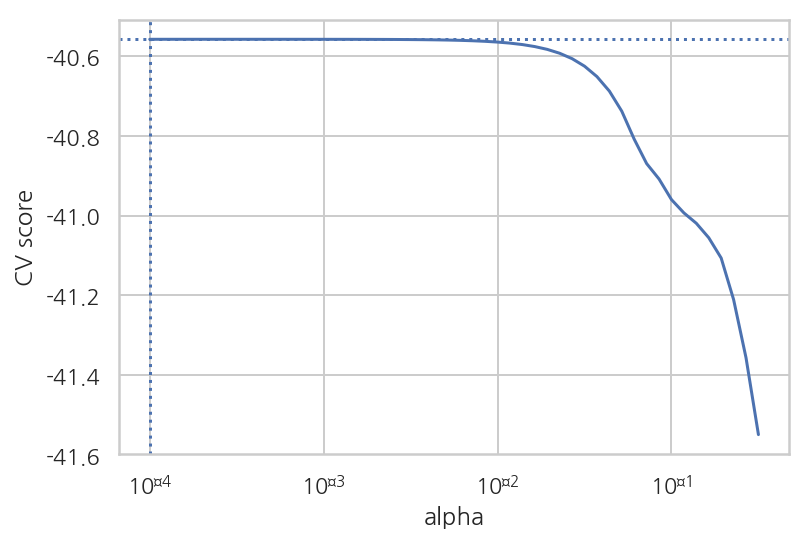

In [220]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, -.5, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(dfX, dfy)

print(lasso_cv.alpha_)

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.semilogx(lasso_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')
plt.axvline(lasso_cv.alpha_, linestyle=':')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

In [241]:
result_regularized = model8.fit_regularized(alpha=0.001, L1_wt=0.5)
print(result_regularized.params)

C(vendor_id)[0]                                      6.146483
C(vendor_id)[1]                                      6.155969
C(pickup_level)[T.1]                                 0.371871
C(pickup_level)[T.2]                                 0.342417
C(holiday)[T.1]                                     -0.029601
scale(I(np.sin(I(2 * np.pi * dayofweek / 7))))       0.028230
scale(I(np.cos(I(2 * np.pi * dayofweek / 7))))      -0.038481
scale(pickup_HMS)                                    0.000000
scale(I(np.sqrt(haversine)))                         0.542007
scale(I(np.sin(I(2 * np.pi * pickup_Ymd / 365))))   -0.026434
scale(I(np.cos(I(2 * np.pi * pickup_Ymd / 365))))    0.000000
dtype: float64


In [236]:
sample_submission = pd.read_csv("sample_submission.csv")

In [243]:
sample_submission.trip_duration = np.exp(result_regularized.predict(test_set))-1

In [245]:
sample_submission.to_csv("sample_submission.csv", index = False)

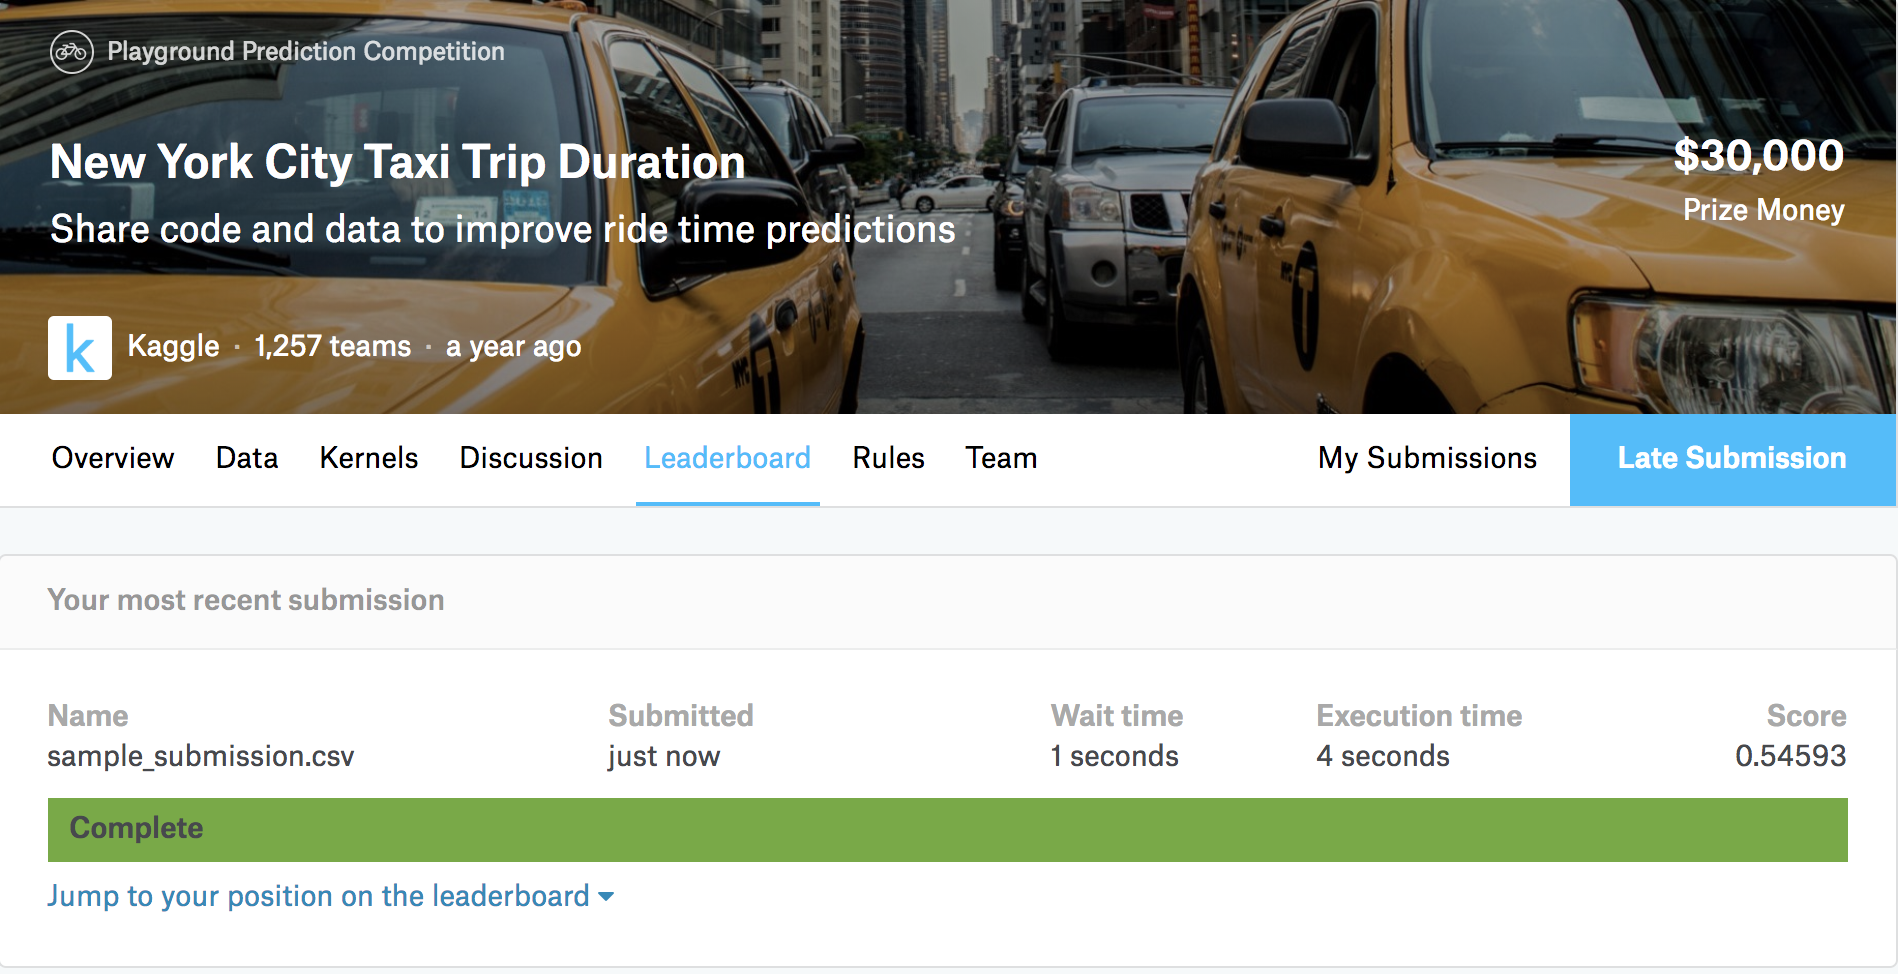

In [133]:
from IPython.display import Image
Image("score.png")